# About

We are conducting a comprehensive evaluation of various deep learning models on the Describable Textures Dataset (DTD), a challenging benchmark for recognizing and classifying texture patterns.

### **Contributors**

  - Ayman Sahyoun - 202110003

  - Aws Alhantouli - 202110250

  - Mohannad AlBasyouni - 202010589

-----------------------
<br>

## **Model Performance Overview:**

**TaskTangent EfficientNetV2**:

[Reference](https://github.com/gortizji/tangent_task_arithmetic)

    Epochs: 25
    Training Metrics:
        Training Loss: 0.7434
        Training Accuracy: 78.09%
    Validation Metrics:
        Validation Loss: 1.3491
        Validation Accuracy: 63.62%
    Test Metrics:
        Test Loss: 1.3109
        Test Accuracy: 64.52%

**ResNet50**:

    Epochs: 15
    Training Metrics:
        Training Loss: 0.3681
        Training Accuracy: 88.38%
    Validation Metrics:
        Validation Loss: 2.1886
        Validation Accuracy: 55.70%
    Test Metrics:
        Test Loss: 2.1365
        Test Accuracy: 52.32%

**ResNet50 (No Vertical Flip, 15% Validation Split)**:

    Epochs: 14 (Early Stopping)
    Training Metrics:
        Training Loss: 0.1959
        Training Accuracy: 93.75%
    Validation Metrics:
        Validation Loss: 2.6100
        Validation Accuracy: 57.14%
    Test Metrics:
        Test Loss: 2.5807
        Test Accuracy: 55.98%

**SimpleCNN**:

    Epochs: 20
    Training Metrics:
        Training Loss: 3.0834
        Training Accuracy: 9.38%
    Validation Metrics:
        Validation Loss: 3.1839
        Validation Accuracy: 20.00%
    Test Metrics:
        Test Loss: 3.4704
        Test Accuracy: 15.01%

**ComplexCNN**:

    Epochs: 20
    Training Metrics:
        Training Loss: 3.8399
        Training Accuracy: 2.27%
    Validation Metrics:
        Validation Loss: 3.8656
        Validation Accuracy: 3.20%
    Test Metrics:
        Test Loss: 3.8704
        Test Accuracy: 13.01%

**DeepTEN**:

[Reference](https://github.com/zhanghang1989/PyTorch-Encoding/blob/master/encoding/models/deepten.py)

    Epochs: 20
    Training Metrics:
        Training Loss: 3.6147
        Training Accuracy: 8.14%
    Validation Metrics:
        Validation Loss: 3.6417
        Validation Accuracy: 7.23%
    Best Validation Accuracy: 7.55%

**DeepTEN with Data Augmentation**:

    Epochs: 20
    Training Metrics:
        Training Loss: 3.6254
        Training Accuracy: 7.57%
    Validation Metrics:
        Validation Loss: 3.6074
        Validation Accuracy: 7.45%
    Best Validation Accuracy: 7.84%

# Loading Libraries and Data

In [ ]:
%pip install torch torchvision Pillow numpy matplotlib seaborn scikit-learn

In [ ]:
!wget https://www.robots.ox.ac.uk/~vgg/data/dtd/download/dtd-r1.0.1.tar.gz
!tar -xvzf dtd-r1.0.1.tar.gz

Streaming output truncated to the last 5000 lines.
dtd/images/porous/porous_0122.jpg
dtd/images/porous/porous_0156.jpg
dtd/images/porous/porous_0091.jpg
dtd/images/porous/porous_0083.jpg
dtd/images/porous/porous_0124.jpg
dtd/images/porous/porous_0151.jpg
dtd/images/porous/porous_0131.jpg
dtd/images/porous/porous_0096.jpg
dtd/images/porous/porous_0153.jpg
dtd/images/porous/porous_0154.jpg
dtd/images/porous/porous_0052.jpg
dtd/images/porous/porous_0172.jpg
dtd/images/porous/porous_0044.jpg
dtd/images/porous/porous_0118.jpg
dtd/images/porous/porous_0140.jpg
dtd/images/porous/porous_0152.jpg
dtd/images/porous/porous_0171.jpg
dtd/images/porous/porous_0132.jpg
dtd/images/porous/porous_0105.jpg
dtd/images/porous/porous_0127.jpg
dtd/images/porous/porous_0130.jpg
dtd/images/porous/porous_0104.jpg
dtd/images/porous/porous_0066.jpg
dtd/images/porous/porous_0158.jpg
dtd/images/porous/porous_0128.jpg
dtd/images/porous/porous_0138.jpg
dtd/images/porous/porous_0133.jpg
dtd/images/porous/porous_0050.j

In [ ]:
import tarfile

# Assuming your dataset file is in the correct path
dataset_path = '/content/dtd-r1.0.1.tar.gz'
extract_path = '/content/dtd'

# Extract the .tar.gz file
with tarfile.open(dataset_path, 'r:gz') as tar:
    tar.extractall(path=extract_path)

# Now use extract_path as your data_dir
data_dir = extract_path


#EDA

In [ ]:
import os
import pandas as pd
import plotly.express as px

image_classes_path = os.path.join(data_dir, 'images')

# Get a list of classes (subdirectories) inside the images folder
classes = os.listdir(image_classes_path)
class_counts = []

# Count the number of images in each class folder
for class_name in classes:
    class_folder = os.path.join(image_classes_path, class_name)
    if os.path.isdir(class_folder):
        count = len(os.listdir(class_folder))
        class_counts.append({'Class': class_name, 'Count': count})

# Convert to a DataFrame for visualization
class_counts_df = pd.DataFrame(class_counts)

# Visualize the counts using Plotly
fig = px.bar(class_counts_df, x='Class', y='Count', title='Count of Images in Each Class')
fig.show()


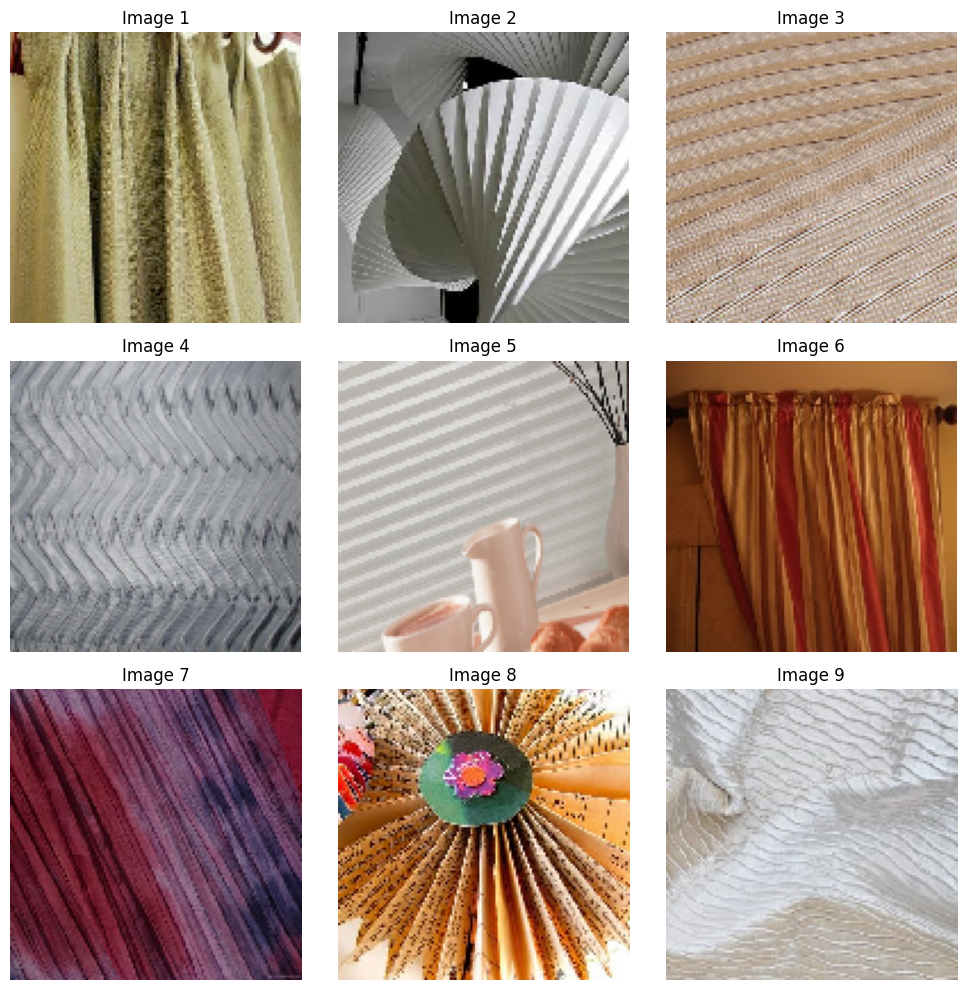

In [ ]:
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

images_dir = os.path.join(data_dir, 'images')


image_paths = []
for category in os.listdir(images_dir):
    category_path = os.path.join(images_dir, category)
    if os.path.isdir(category_path):

        images_in_category = os.listdir(category_path)[:9]
        for img_file in images_in_category:
            image_paths.append(os.path.join(category_path, img_file))
            if len(image_paths) >= 9:
                break
    if len(image_paths) >= 9:
        break

plt.figure(figsize=(10, 10))

for i, img_path in enumerate(image_paths):

    orig = cv2.imread(img_path)
    if orig is None:
        continue
    orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
    orig = orig * 1.0 / 255.0
    orig = cv2.resize(orig, (128, 128), interpolation=cv2.INTER_NEAREST)


    plt.subplot(3, 3, i + 1)
    plt.title(f'Image {i+1}')
    plt.imshow(orig)
    plt.axis('off')

plt.tight_layout()
plt.show()

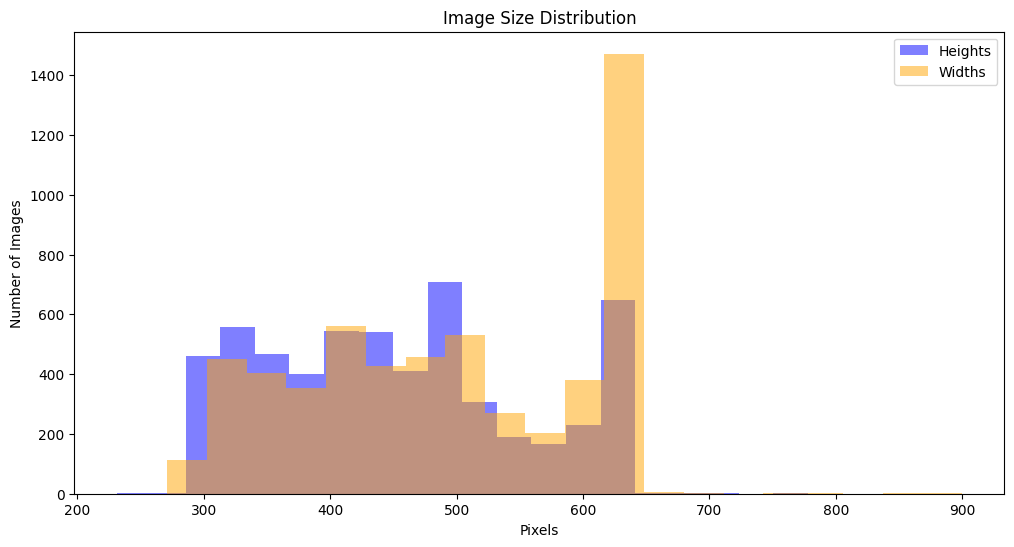

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def load_image_paths(data_root, label_files):
    """Load all image paths from the provided label files."""
    image_paths = []
    for label_file in label_files:
        label_file_path = os.path.join(data_root, 'labels', label_file)
        if os.path.exists(label_file_path):
            with open(label_file_path, 'r') as f:
                image_paths.extend([line.strip() for line in f])
    return image_paths

def plot_image_size_distribution(image_paths, img_dir):
    """Plot the distribution of image sizes."""
    image_sizes = []

    for img_path in image_paths:
        full_path = os.path.join(img_dir, img_path)
        try:
            img = Image.open(full_path)
            image_sizes.append(img.size)  # (width, height)
            img.close()
        except Exception as e:
            print(f"Error loading image {full_path}: {e}")

    # Separate widths and heights
    widths, heights = zip(*image_sizes)

    plt.figure(figsize=(12, 6))
    plt.hist(heights, bins=20, alpha=0.5, label='Heights', color='blue')
    plt.hist(widths, bins=20, alpha=0.5, label='Widths', color='orange')
    plt.title("Image Size Distribution")
    plt.xlabel("Pixels")
    plt.ylabel("Number of Images")
    plt.legend()
    plt.show()

# Load all image paths from train, val, and test
label_files = ['train1.txt', 'val1.txt', 'test1.txt']
image_paths = load_image_paths(data_dir, label_files)

# Image directory in the extracted dataset
img_dir = os.path.join(data_dir, 'images')

# Plot the image size distribution
plot_image_size_distribution(image_paths, img_dir)


#Tangent

In [ ]:
import torch
import torch.nn as nn
from typing import Optional, Union, List, Tuple
import copy

class TangentTaskVector:
    """Implementation of task vectors in the tangent space for model editing."""

    def __init__(
        self,
        base_model: nn.Module,
        finetuned_model: nn.Module,
        device: Optional[torch.device] = None
    ):
        """Initialize a task vector from base and finetuned models.

        Args:
            base_model: The pre-trained model
            finetuned_model: The fine-tuned model
            device: Device to store the vector on
        """
        self.device = device or torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.vector = {}

        # Compute the task vector as difference in tangent space
        with torch.no_grad():
            base_params = dict(base_model.named_parameters())
            finetuned_params = dict(finetuned_model.named_parameters())

            # Only compute differences for classifier parameters
            for name in base_params:
                if name in finetuned_params and 'classifier' in name:
                    self.vector[name] = (finetuned_params[name] - base_params[name]).to(self.device)

    def __neg__(self) -> 'TangentTaskVector':
        """Negate the task vector."""
        negated = TangentTaskVector.__new__(TangentTaskVector)
        negated.device = self.device
        negated.vector = {name: -vec for name, vec in self.vector.items()}
        return negated

    def __mul__(self, scalar: float) -> 'TangentTaskVector':
        """Scale the task vector by a scalar."""
        scaled = TangentTaskVector.__new__(TangentTaskVector)
        scaled.device = self.device
        scaled.vector = {name: scalar * vec for name, vec in self.vector.items()}
        return scaled

    def __add__(self, other: 'TangentTaskVector') -> 'TangentTaskVector':
        """Add two task vectors."""
        if not isinstance(other, TangentTaskVector):
            raise TypeError("Can only add TangentTaskVector instances")

        combined = TangentTaskVector.__new__(TangentTaskVector)
        combined.device = self.device
        combined.vector = {}

        # Add vectors for parameters present in both
        for name in set(self.vector.keys()) & set(other.vector.keys()):
            combined.vector[name] = self.vector[name] + other.vector[name]

        return combined

    def apply_to(
        self,
        model: nn.Module,
        scaling_coef: float = 1.0
    ) -> nn.Module:
        """Apply the task vector to a model.

        Args:
            model: Model to apply the vector to
            scaling_coef: Scaling coefficient for the vector

        Returns:
            Modified copy of the input model
        """
        # Create a new model instance
        new_model = copy.deepcopy(model)

        # Apply the scaled task vector only to classifier parameters
        with torch.no_grad():
            for name, param in new_model.named_parameters():
                if name in self.vector and 'classifier' in name:
                    param.data = param.data + scaling_coef * self.vector[name]

        return new_model

    def to(self, device: torch.device) -> 'TangentTaskVector':
        """Move the task vector to specified device."""
        self.device = device
        self.vector = {name: vec.to(device) for name, vec in self.vector.items()}
        return self

    @staticmethod
    def combine(
        vectors: List['TangentTaskVector'],
        coefficients: List[float]
    ) -> 'TangentTaskVector':
        """Combine multiple task vectors with given coefficients.

        Args:
            vectors: List of task vectors
            coefficients: List of coefficients for linear combination

        Returns:
            Combined task vector
        """
        if len(vectors) != len(coefficients):
            raise ValueError("Number of vectors must match number of coefficients")

        result = vectors[0] * coefficients[0]
        for vec, coef in zip(vectors[1:], coefficients[1:]):
            result += vec * coef

        return result

    def get_parameter_norm(self) -> float:
        """Calculate the Frobenius norm of the task vector."""
        squared_norm = 0.0
        for vec in self.vector.values():
            squared_norm += torch.sum(vec ** 2).item()
        return torch.sqrt(torch.tensor(squared_norm)).item()


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision.transforms import RandomAffine, RandomPerspective, RandomResizedCrop

class DTDDataset(Dataset):
    """Custom Dataset for DTD (Describable Textures Dataset)"""
    def __init__(self, img_dir, file_labels, transform=None):
        """
        Args:
            img_dir (string): Directory with all the images
            file_labels (list): List of (file_path, label) tuples
            transform (callable, optional): Optional transform to be applied on an image
        """
        self.img_dir = img_dir
        self.file_labels = file_labels
        self.transform = transform

    def __len__(self):
        return len(self.file_labels)

    def __getitem__(self, idx):
        img_path, label = self.file_labels[idx]
        # Construct full image path
        full_path = os.path.join(self.img_dir, img_path)

        try:
            image = Image.open(full_path).convert('RGB')
        except Exception as e:
            print(f"Error loading image {full_path}: {e}")
            # Return a dummy image in case of error
            image = Image.new('RGB', (224, 224))

        if self.transform:
            image = self.transform(image)

        return image, label

class TextureClassifier:
    def __init__(self, num_classes=5, batch_size=32, learning_rate=0.001, categories=None):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.batch_size = batch_size

        # All available DTD categories
        self.all_categories = [
            'banded', 'blotchy', 'braided', 'bubbly', 'bumpy', 'chequered',
            'cobwebbed', 'cracked', 'crosshatched', 'crystalline', 'dotted',
            'fibrous', 'flecked', 'freckled', 'frilly', 'gauzy', 'grid',
            'grooved', 'honeycombed', 'interlaced', 'knitted', 'lacelike',
            'lined', 'marbled', 'matted', 'meshed', 'paisley', 'perforated',
            'pitted', 'pleated', 'polka-dotted', 'porous', 'potholed',
            'scaly', 'smeared', 'spiralled', 'sprinkled', 'stained',
            'stratified', 'striped', 'studded', 'swirly', 'veined',
            'waffled', 'woven', 'wrinkled', 'zigzagged'
        ]

        # Set categories based on input
        if categories is None:
            # If no categories specified, use first num_classes categories
            self.class_names = self.all_categories[:num_classes]
        elif isinstance(categories, int):
            # If number specified, use that many categories
            self.class_names = self.all_categories[:categories]
        else:
            # If specific categories provided, use those
            self.class_names = [cat for cat in categories if cat in self.all_categories]

        self.num_classes = len(self.class_names)

        # Enhanced data transforms with stronger augmentation
        self.train_transform = transforms.Compose([
            transforms.Resize((256, 256)),  # Resize larger for RandomResizedCrop
            # transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomVerticalFlip(p=0.3),
            # transforms.RandomAffine(
            #     degrees=30,
            #     translate=(0.1, 0.1),
            #     scale=(0.8, 1.2),
            #     shear=15
            # ),
            # transforms.RandomPerspective(distortion_scale=0.2, p=0.5),
            transforms.ColorJitter(
                brightness=0.2,
                contrast=0.2,
                saturation=0.2,
                hue=0.1
            ),
            transforms.RandomGrayscale(p=0.1),
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]
            )
        ])

        # Keep validation transform the same
        self.val_transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]
            )
        ])

        # Initialize models
        self.base_model = self._init_model(linear_head=False)
        self.model = self._init_model(linear_head=True)
        self.criterion = nn.CrossEntropyLoss()

        # Update optimizer to use classifier instead of fc
        self.optimizer = optim.Adam(self.model.classifier.parameters(), lr=learning_rate)

    def _init_model(self, linear_head=True):
        """Initialize model with option for linear fine-tuning."""
        # Use EfficientNet-V2-L for better performance
        model = models.efficientnet_v2_l(weights=models.EfficientNet_V2_L_Weights.IMAGENET1K_V1)

        # Freeze all parameters
        for param in model.parameters():
            param.requires_grad = False

        # Replace the classifier
        model.classifier = nn.Sequential(
            nn.Dropout(p=0.4),
            nn.Linear(model.classifier[1].in_features, self.num_classes)
        )

        if linear_head:
            # Only enable gradient for the classifier
            for param in model.classifier.parameters():
                param.requires_grad = True

        return model.to(self.device)

    def load_data(self, data_root):
        """Load DTD dataset with subset of categories."""
        img_dir = os.path.join(data_root, 'images')

        self.class_names = [cls for cls in self.class_names if os.path.exists(os.path.join(img_dir, cls))]
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.class_names)}

        def get_label_data(label_file):
            data = []
            try:
                with open(os.path.join(data_root, 'labels', label_file), 'r') as f:
                    for line in f:
                        img_path = line.strip()
                        category = img_path.split('/')[0]
                        # Only include images from our subset of categories
                        if category in self.class_to_idx:
                            label = self.class_to_idx[category]
                            data.append((img_path, label))
            except FileNotFoundError:
                print(f"Warning: {label_file} not found")
                return []
            return data

        # Create datasets with subset of categories
        train_data = DTDDataset(
            img_dir=img_dir,
            file_labels=get_label_data('train1.txt'),
            transform=self.train_transform
        )

        val_data = DTDDataset(
            img_dir=img_dir,
            file_labels=get_label_data('val1.txt'),
            transform=self.val_transform
        )

        test_data = DTDDataset(
            img_dir=img_dir,
            file_labels=get_label_data('test1.txt'),
            transform=self.val_transform
        )

        self.train_loader = DataLoader(
            train_data,
            batch_size=self.batch_size,
            shuffle=True,
            num_workers=4
        )

        self.val_loader = DataLoader(
            val_data,
            batch_size=self.batch_size,
            shuffle=False,
            num_workers=4
        )

        self.test_loader = DataLoader(
            test_data,
            batch_size=self.batch_size,
            shuffle=False,
            num_workers=4
        )

        print(f"Using {len(self.class_names)} categories: {self.class_names}")
        print(f"Dataset sizes - Train: {len(train_data)}, Val: {len(val_data)}, Test: {len(test_data)}")

    def train_epoch(self):
        """Train for one epoch."""
        self.model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in self.train_loader:
            inputs, labels = inputs.to(self.device), labels.to(self.device)

            self.optimizer.zero_grad()
            outputs = self.model(inputs)
            loss = self.criterion(outputs, labels)
            loss.backward()
            self.optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        epoch_loss = running_loss / len(self.train_loader)
        epoch_acc = 100. * correct / total
        return epoch_loss, epoch_acc

    def evaluate(self, loader):
        """Evaluate model on given loader."""
        self.model.eval()
        running_loss = 0.0
        correct = 0
        total = 0
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for inputs, labels in loader:
                inputs, labels = inputs.to(self.device), labels.to(self.device)
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)

                running_loss += loss.item()
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        return (running_loss / len(loader),
                100. * correct / total,
                confusion_matrix(all_labels, all_preds))

    def train(self, num_epochs=30):
        """Train the model."""
        best_val_acc = 0
        train_losses, train_accs = [], []
        val_losses, val_accs = [], []

        for epoch in range(num_epochs):
            # Train
            train_loss, train_acc = self.train_epoch()
            train_losses.append(train_loss)
            train_accs.append(train_acc)

            # Validate
            val_loss, val_acc, _ = self.evaluate(self.val_loader)
            val_losses.append(val_loss)
            val_accs.append(val_acc)

            print(f'Epoch {epoch+1}/{num_epochs}:')
            print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
            print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

            # Save best model
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                torch.save(self.model.state_dict(), 'best_model.pth')

        return train_losses, train_accs, val_losses, val_accs

    def plot_metrics(self, train_losses, train_accs, val_losses, val_accs):
        """Plot training metrics."""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

        # Plot losses
        ax1.plot(train_losses, label='Train Loss')
        ax1.plot(val_losses, label='Val Loss')
        ax1.set_title('Loss vs Epoch')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.legend()

        # Plot accuracies
        ax2.plot(train_accs, label='Train Acc')
        ax2.plot(val_accs, label='Val Acc')
        ax2.set_title('Accuracy vs Epoch')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy (%)')
        ax2.legend()

        plt.tight_layout()
        plt.savefig('training_metrics.png')
        plt.close()

    def plot_confusion_matrix(self, cm):
        """Plot confusion matrix."""
        plt.figure(figsize=(15, 15))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=self.class_names,
                   yticklabels=self.class_names)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.xticks(rotation=45)
        plt.yticks(rotation=45)
        plt.tight_layout()
        plt.savefig('confusion_matrix.png')
        plt.close()

def main():

    classifier = TextureClassifier(categories=47)  # Use first 10 categories

    # Load data
    data_root = 'dtd'
    classifier.load_data(data_root)

    # Train model with linear fine-tuning
    train_losses, train_accs, val_losses, val_accs = classifier.train(num_epochs=5)

    # Plot training metrics
    classifier.plot_metrics(train_losses, train_accs, val_losses, val_accs)

    # Evaluate on test set
    test_loss, test_acc, conf_matrix = classifier.evaluate(classifier.test_loader)
    print(f'\nTest Results:')
    print(f'Loss: {test_loss:.4f}, Accuracy: {test_acc:.2f}%')

    # Plot confusion matrix
    classifier.plot_confusion_matrix(conf_matrix)

    # Save the linearly fine-tuned model
    torch.save({
        'model_state_dict': classifier.model.state_dict(),
        'optimizer_state_dict': classifier.optimizer.state_dict(),
        'class_names': classifier.class_names,
        'class_to_idx': classifier.class_to_idx
    }, 'linear_finetuned_model.pth')

    # Create and save task vector
    task_vector = TangentTaskVector(classifier.base_model, classifier.model)
    torch.save(task_vector.vector, 'texture_task_vector.pth')

if __name__ == '__main__':
    main()

Using 47 categories: ['banded', 'blotchy', 'braided', 'bubbly', 'bumpy', 'chequered', 'cobwebbed', 'cracked', 'crosshatched', 'crystalline', 'dotted', 'fibrous', 'flecked', 'freckled', 'frilly', 'gauzy', 'grid', 'grooved', 'honeycombed', 'interlaced', 'knitted', 'lacelike', 'lined', 'marbled', 'matted', 'meshed', 'paisley', 'perforated', 'pitted', 'pleated', 'polka-dotted', 'porous', 'potholed', 'scaly', 'smeared', 'spiralled', 'sprinkled', 'stained', 'stratified', 'striped', 'studded', 'swirly', 'veined', 'waffled', 'woven', 'wrinkled', 'zigzagged']
Dataset sizes - Train: 1880, Val: 1880, Test: 1880
Epoch 1/5:
Train Loss: 3.3835, Train Acc: 18.09%
Val Loss: 2.7756, Val Acc: 42.71%


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 2/5:
Train Loss: 2.2146, Train Acc: 48.51%
Val Loss: 2.2066, Val Acc: 53.19%


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 3/5:
Train Loss: 1.7797, Train Acc: 57.45%
Val Loss: 1.9614, Val Acc: 56.06%


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 4/5:
Train Loss: 1.5614, Train Acc: 60.85%
Val Loss: 1.8318, Val Acc: 56.97%


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 5/5:
Train Loss: 1.3432, Train Acc: 66.01%
Val Loss: 1.7215, Val Acc: 58.72%


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(



Test Results:
Loss: 1.6961, Accuracy: 61.17%


#Simple CNN



*   Input Layer: Shape (224, 224, 3) (image dimensions with 3 color channels - RGB).
*   Conv2D Layer: 32 filters, (3x3) kernel, ReLU activation.
*   Conv2D Layer: 64 filters, (3x3) kernel, ReLU activation.
*   Conv2D Layer: 128 filters, (3x3) kernel, ReLU activation.
*   MaxPooling2D Layer: (2x2) pool size to reduce spatial dimensions (followed after each Conv2D Layer).
*   Flatten Layer: Flattenns the 3D output into a 1D vector
*   Dense Layer: 128 neurons with ReLU activation.
*   Dropout Layer: 50% dropout rate for regularization.
*   Output Layer: 47 neurons (one per class), Softmax activation for multi-class classification.



In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

# Step 1: Setup the augmented preprocessing using Keras
# Equivalent of the PyTorch transform.Compose
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=30,  # Randomly rotate images by 30 degrees
    width_shift_range=0.1,  # Shift width by 10%
    height_shift_range=0.1,  # Shift height by 10%
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Randomly zoom in on images
    horizontal_flip=True,  # Flip images horizontally
    vertical_flip=True,  # Flip images vertically
    brightness_range=[0.8, 1.2],  # Random brightness adjustments
    fill_mode='nearest',  # Filling strategy for rotations/shifts
    validation_split=0.1  # Reserve 10% of data for validation
)

# For testing, only normalize without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

# Step 2: Load data using flow_from_directory (pointing to the 'images' folder)
data_dir = '/content/dtd/images'  # Path to your image dataset
image_size = (224, 224)
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Should be 80% of the dataset
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Should be 10% of the dataset
)

test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # No shuffling for evaluation
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


def create_simple_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),

        Dense(num_classes, activation='softmax')
    ])


    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

input_shape = (224, 224, 3)
num_classes = 47
model_Simple_CNN = create_simple_cnn(input_shape, num_classes)

In [ ]:
checkpoint = ModelCheckpoint(
    '/content/best_simple_cnn_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    mode='min'
)


history3 = model_Simple_CNN.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[checkpoint, early_stopping]
)

model_Simple_CNN.load_weights('/content/best_simple_cnn_model.keras')

val_loss, val_accuracy = model_Simple_CNN.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

Epoch 1/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.0814 - loss: 3.6584
Epoch 1: val_accuracy improved from -inf to 0.08824, saving model to /content/best_simple_cnn_model.keras
158/158 ━━━━━━━━━━━━━━━━━━━━ 99s 587ms/step - accuracy: 0.0814 - loss: 3.6583 - val_accuracy: 0.0882 - val_loss: 3.6300
Epoch 2/20
  1/158 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.0000e+00 - loss: 3.9012
Epoch 2: val_accuracy did not improve from 0.08824
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 167us/step - accuracy: 0.0000e+00 - loss: 3.9012 - val_accuracy: 0.0500 - val_loss: 3.7437
Epoch 3/20
157/158 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.0906 - loss: 3.6041
Epoch 3: val_accuracy improved from 0.08824 to 0.10110, saving model to /content/best_simple_cnn_model.keras
158/158 ━━━━━━━━━━━━━━━━━━━━ 147s 634ms/step - accuracy: 0.0905 - loss: 3.6042 - val_accuracy: 0.1011 - val_loss: 3.6487
Epoch 4/20
  1/158 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.0938 - loss: 3.6808
Epoch 4: val_ac

<ipython-input-24-febcc8340ab2>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.
  ax[0].plot(epochs, train_acc, 'go-', color='r', label='Training Accuracy')
<ipython-input-24-febcc8340ab2>:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-o" (-> color='g'). The keyword argument will take precedence.
  ax[1].plot(epochs, train_loss, 'g-o', color='r', label='Training Loss')


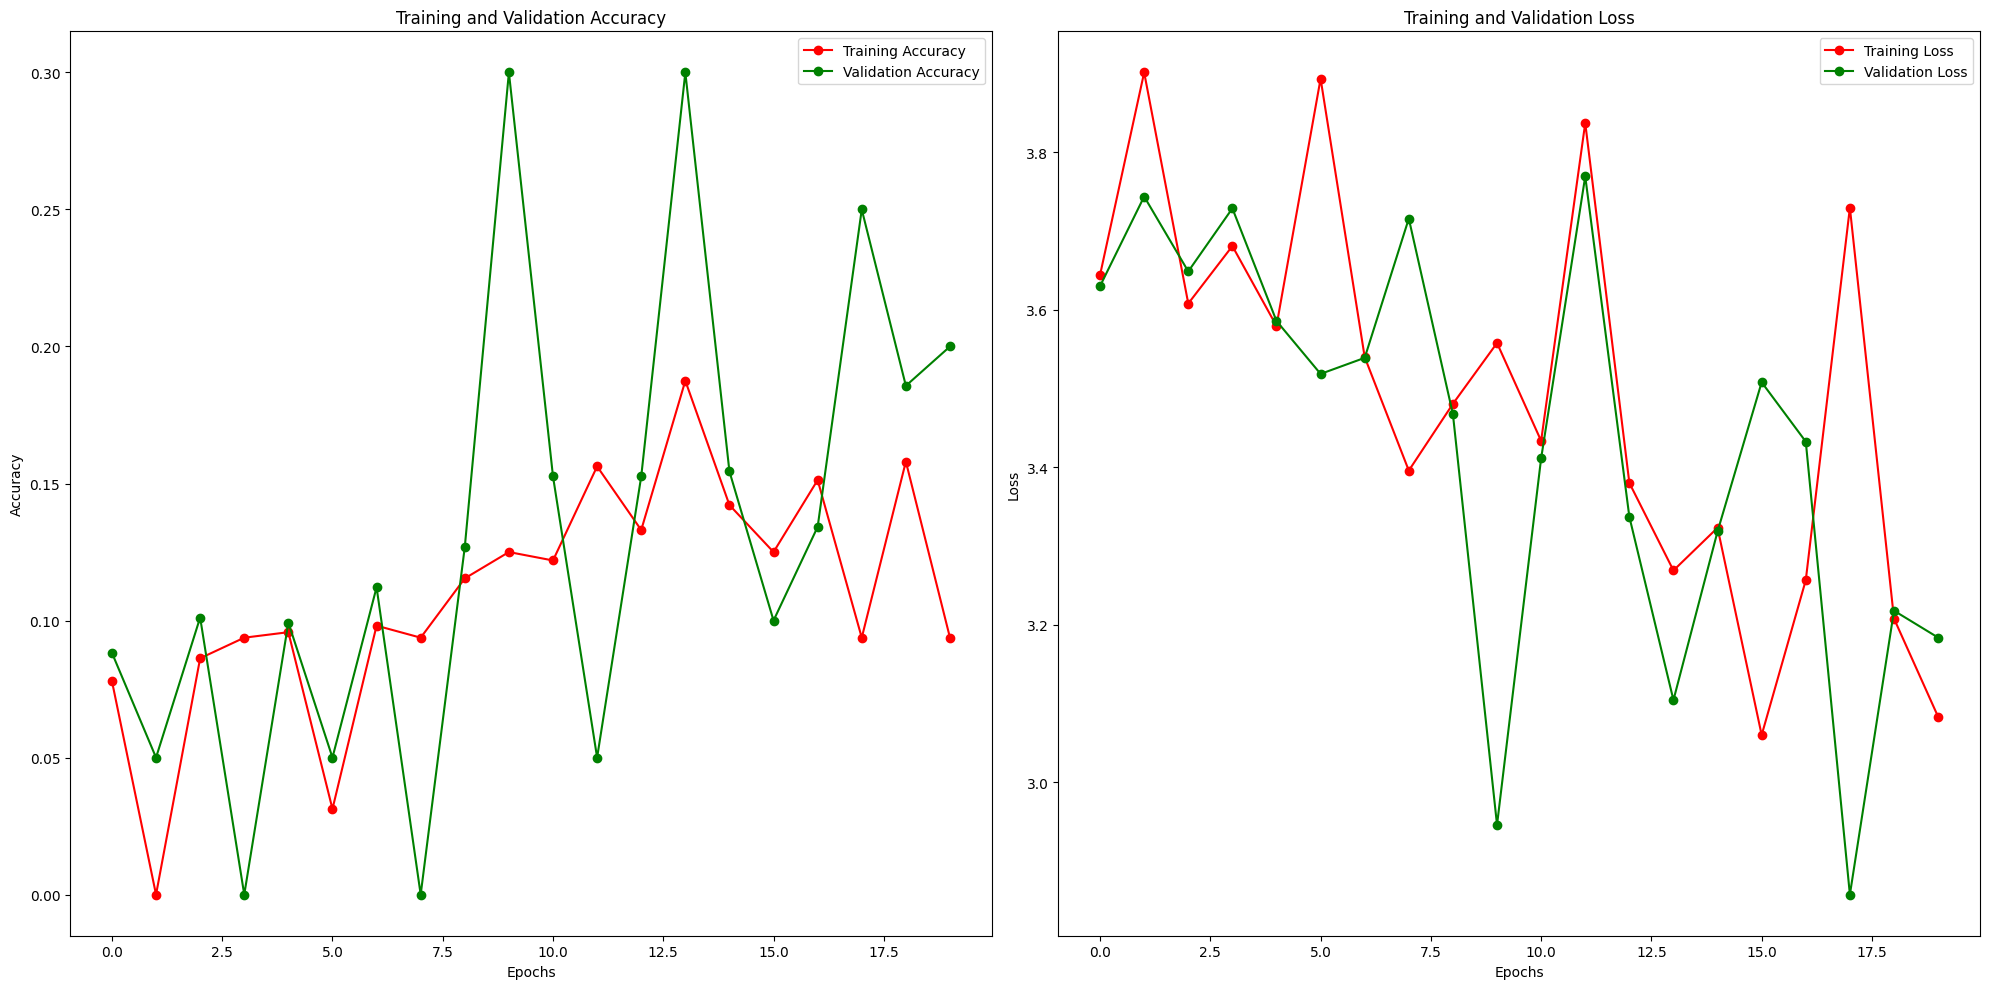

In [ ]:
import matplotlib.pyplot as plt

epochs = list(range(len(history3.history['accuracy'])))

fig, ax = plt.subplots(1, 2)

train_acc = history3.history['accuracy']
train_loss = history3.history['loss']
val_acc = history3.history['val_accuracy']
val_loss = history3.history['val_loss']

fig.set_size_inches(20, 10)

ax[0].plot(epochs, train_acc, 'go-', color='r', label='Training Accuracy')
ax[0].plot(epochs, val_acc, 'go-', label='Validation Accuracy')
ax[0].set_title('Training and Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, train_loss, 'g-o', color='r', label='Training Loss')
ax[1].plot(epochs, val_loss, 'go-', label='Validation Loss')
ax[1].set_title('Training and Validation Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

plt.tight_layout()
plt.show()


18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 526ms/step


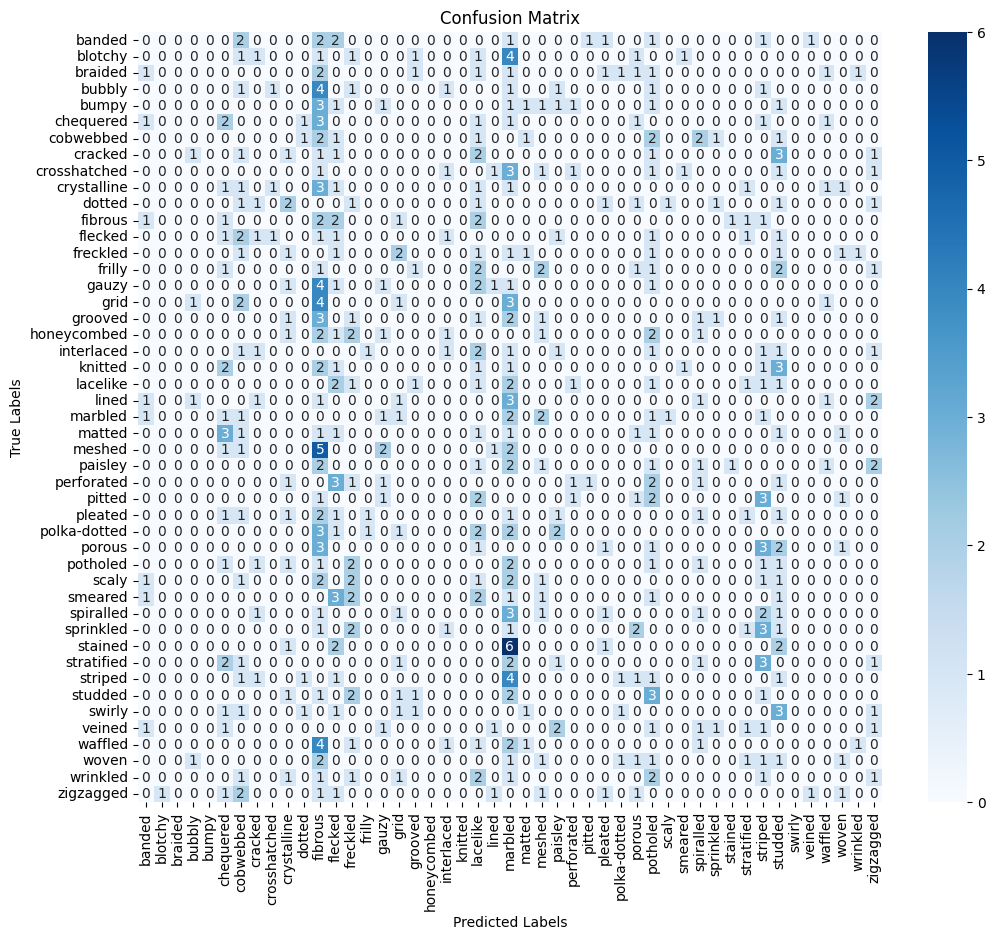

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model_Simple_CNN.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)


y_true = validation_generator.classes

class_names = list(validation_generator.class_indices.keys())


conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Complex CNN

*   Input Layer: Shape (224, 224, 3) (image dimensions with 3 color channels - RGB).
*   First Conv2D Layer: 64 filters, (3x3) kernel, same padding, ReLU activation.
*   Second Conv2D Layer: 128 filters, (3x3) kernel, same padding, ReLU activation.
*   Third and Fourth Conv2D Layer: 256 filters, (3x3) kernel, same padding, ReLU activation.
*   Fifth and Sixth Conv2D Layer: 512 filters, (3x3) kernel, same padding, ReLU activation.
*   MaxPooling2D Layers and Dropout Layer where added after almost each Conv2D layer.
*   GlobalAveragePooling2D Layer: Replaces Flatten, reduces spatial dimensions to a vector by averaging
*   Dense Layer: 512 neurons with ReLU activation.
*   Dropout Layer: 50% dropout rate.
*   Output Layer: 47 neurons (one per class), Softmax activation for multi-class classification.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D
)
from tensorflow.keras.regularizers import l2

def create_complex_cnn(input_shape, num_classes):
    model = Sequential()

    model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(0.001), input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(GlobalAveragePooling2D())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

input_shape = (224, 224, 3)
num_classes = 47

model_Complex_CNN = create_complex_cnn(input_shape, num_classes)

model_Complex_CNN.summary()

In [ ]:
checkpoint = ModelCheckpoint(
    '/content/best_complex_cnn_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    mode='min'
)


history4 = model_Complex_CNN.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[checkpoint, early_stopping]
)

model_Complex_CNN.load_weights('/content/best_complex_cnn_model.keras')

val_loss, val_accuracy = model_Complex_CNN.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

In [ ]:
import matplotlib.pyplot as plt

epochs = list(range(len(history4.history['accuracy'])))

fig, ax = plt.subplots(1, 2)

train_acc = history4.history['accuracy']
train_loss = history4.history['loss']
val_acc = history4.history['val_accuracy']
val_loss = history4.history['val_loss']

fig.set_size_inches(20, 10)

ax[0].plot(epochs, train_acc, 'go-', color='r', label='Training Accuracy')
ax[0].plot(epochs, val_acc, 'go-', label='Validation Accuracy')
ax[0].set_title('Training and Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, train_loss, 'g-o', color='r', label='Training Loss')
ax[1].plot(epochs, val_loss, 'go-', label='Validation Loss')
ax[1].set_title('Training and Validation Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model_Complex_CNN.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)


y_true = validation_generator.classes

class_names = list(validation_generator.class_indices.keys())


conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

For some reason this model focuses on predicting paisley.

#ResNet50

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

# Step 1: Setup the augmented preprocessing using Keras
# Equivalent of the PyTorch transform.Compose
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=30,  # Randomly rotate images by 30 degrees
    width_shift_range=0.1,  # Shift width by 10%
    height_shift_range=0.1,  # Shift height by 10%
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Randomly zoom in on images
    horizontal_flip=True,  # Flip images horizontally
    vertical_flip=True,  # Flip images vertically
    brightness_range=[0.8, 1.2],  # Random brightness adjustments
    fill_mode='nearest',  # Filling strategy for rotations/shifts
    validation_split=0.1  # Reserve 10% of data for validation
)

# For testing, only normalize without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

# Step 2: Load data using flow_from_directory (pointing to the 'images' folder)
data_dir = '/content/dtd/images'  # Path to your image dataset
image_size = (224, 224)
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Should be 80% of the dataset
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Should be 10% of the dataset
)

test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # No shuffling for evaluation
)



Found 5076 images belonging to 47 classes.
Found 564 images belonging to 47 classes.
Found 5640 images belonging to 47 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import backend as K
import tensorflow as tf

# Clear any previous session
K.clear_session()
tf.keras.backend.clear_session()

# Initialize the ResNet50 model correctly with pre-trained weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling
x = Dense(1024, activation='relu')(x)  # Dense layer with 1024 units
predictions = Dense(train_generator.num_classes, activation='softmax')(x)  # Output layer based on number of categories

# Create the model
model_ResNet50 = Model(inputs=base_model.input, outputs=predictions)

# Step 5: Compile the model
opt = Adam(learning_rate=0.0001)
model_ResNet50.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model_ResNet50.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 25,734,063 (98.17 MB)

 Trainable params: 25,680,943 (97.97 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
checkpoint = ModelCheckpoint(
    '/content/best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

history = model_ResNet50.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[checkpoint, early_stopping]
)


model_ResNet50.load_weights('best_model.keras')
val_loss, val_accuracy = model_ResNet50.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 733ms/step - accuracy: 0.3008 - loss: 2.8248
Epoch 1: val_accuracy improved from -inf to 0.02757, saving model to /content/best_model.keras
158/158 ━━━━━━━━━━━━━━━━━━━━ 184s 839ms/step - accuracy: 0.3016 - loss: 2.8207 - val_accuracy: 0.0276 - val_loss: 4.6400
Epoch 2/15
  1/158 ━━━━━━━━━━━━━━━━━━━━ 53s 344ms/step - accuracy: 0.5938 - loss: 1.4808

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy did not improve from 0.02757
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5938 - loss: 1.4808 - val_accuracy: 0.0000e+00 - val_loss: 4.6183
Epoch 3/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 564ms/step - accuracy: 0.6447 - loss: 1.2068
Epoch 3: val_accuracy did not improve from 0.02757
158/158 ━━━━━━━━━━━━━━━━━━━━ 146s 617ms/step - accuracy: 0.6447 - loss: 1.2069 - val_accuracy: 0.0257 - val_loss: 6.2994
Epoch 4/15
  1/158 ━━━━━━━━━━━━━━━━━━━━ 45s 289ms/step - accuracy: 0.5312 - loss: 1.4409
Epoch 4: val_accuracy did not improve from 0.02757
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.5312 - loss: 1.4409 - val_accuracy: 0.0000e+00 - val_loss: 7.0089
Epoch 5/15
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 561ms/step - accuracy: 0.7443 - loss: 0.8549
Epoch 5: val_accuracy improved from 0.02757 to 0.12868, saving model to /content/best_model.keras
158/158 ━━━━━━━━━━━━━━━━━━━━ 107s 652ms/step - accuracy: 0.7442 - loss: 0.8552 - val_accuracy: 0.1287 - val_loss: 4.7

<ipython-input-19-46645cdc44ab>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.
  ax[0].plot(epochs, train_acc, 'go-', color='r', label='Training Accuracy')
<ipython-input-19-46645cdc44ab>:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-o" (-> color='g'). The keyword argument will take precedence.
  ax[1].plot(epochs, train_loss, 'g-o', color='r', label='Training Loss')


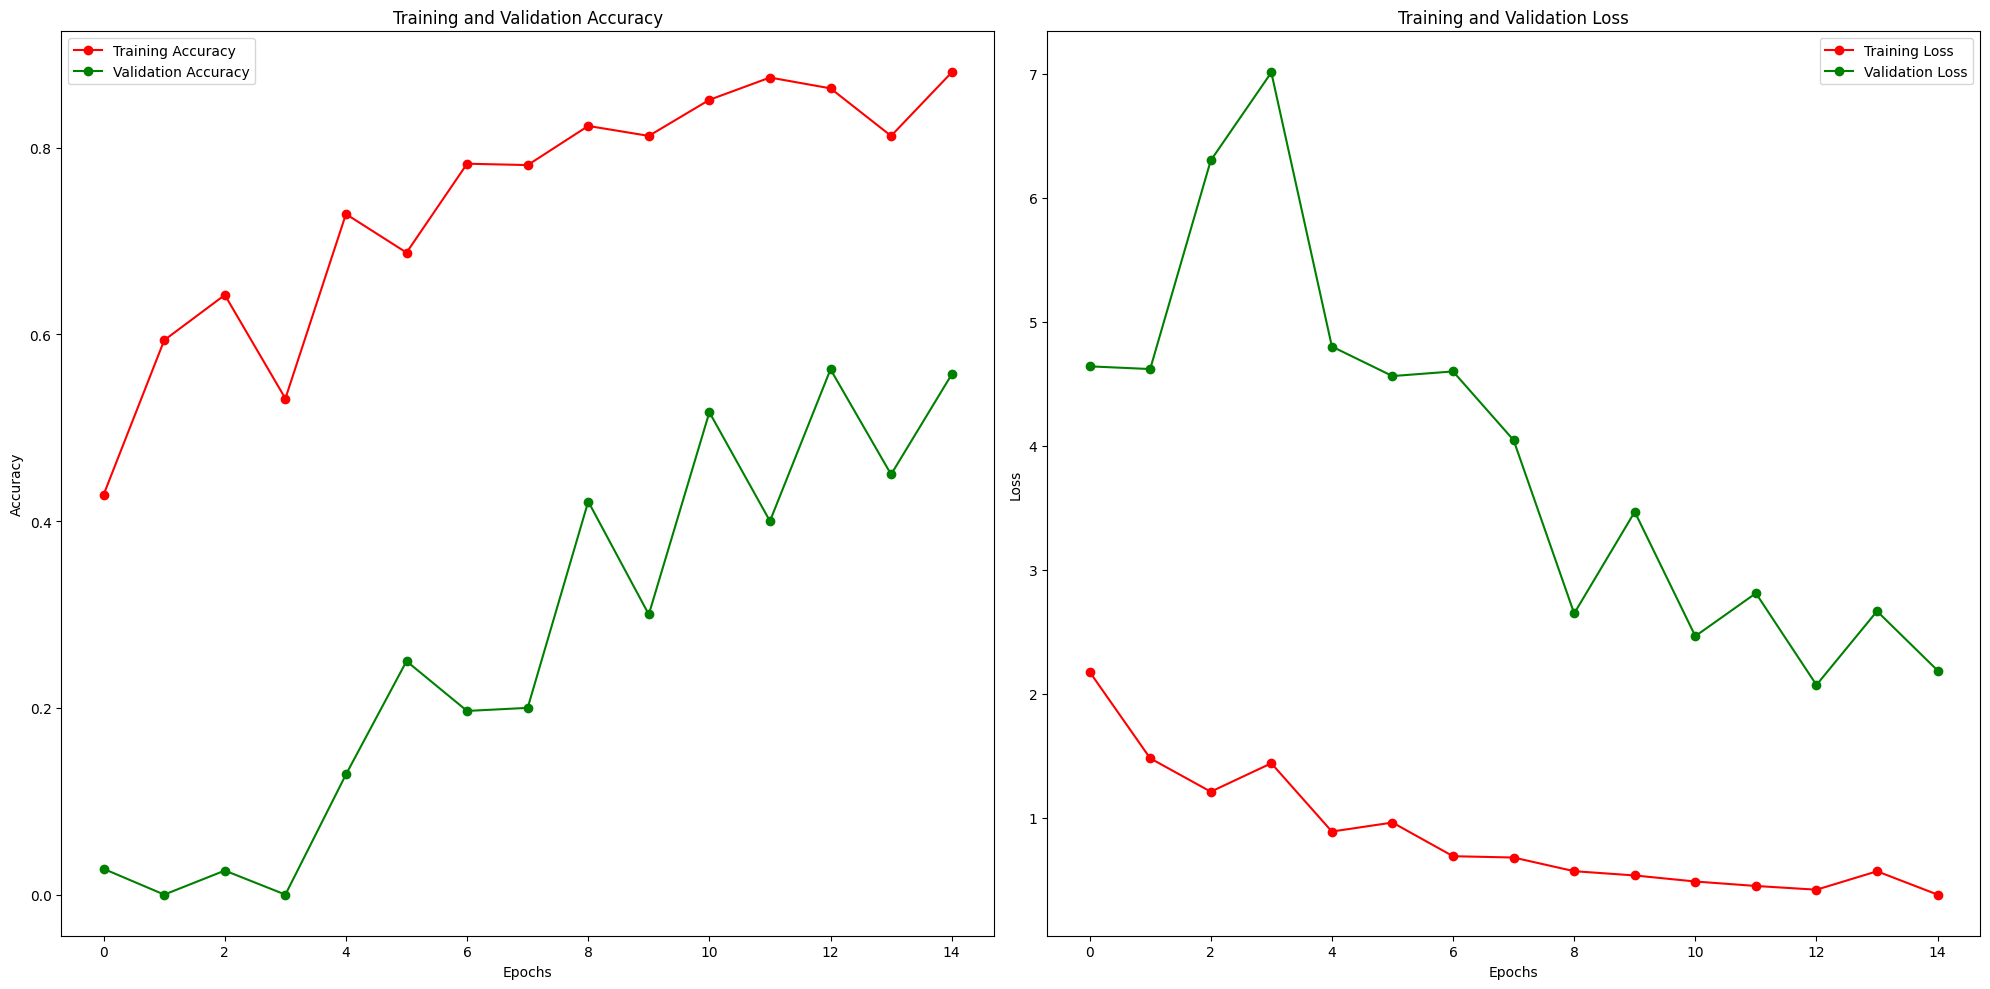

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Visualize Training History
epochs = list(range(len(history.history['accuracy'])))

# Create a figure with 1 row and 2 columns for Accuracy and Loss plots
fig, ax = plt.subplots(1, 2)

# Extract the relevant metrics from the training history
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Set the figure size
fig.set_size_inches(20, 10)

# Plot Training and Validation Accuracy
ax[0].plot(epochs, train_acc, 'go-', color='r', label='Training Accuracy')
ax[0].plot(epochs, val_acc, 'go-', label='Validation Accuracy')
ax[0].set_title('Training and Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

# Plot Training and Validation Loss
ax[1].plot(epochs, train_loss, 'g-o', color='r', label='Training Loss')
ax[1].plot(epochs, val_loss, 'go-', label='Validation Loss')
ax[1].set_title('Training and Validation Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

# Display the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 679ms/step


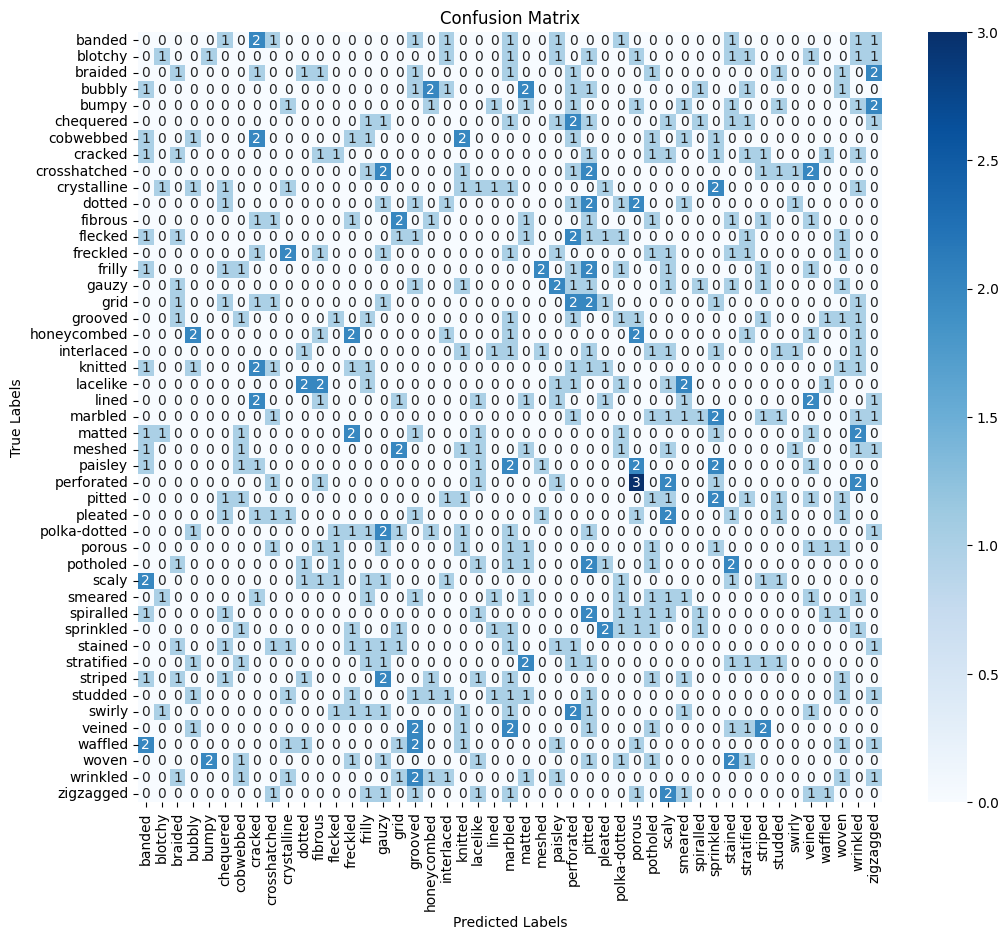

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 2: Generate Predictions for the Confusion Matrix
# Predict the classes for the validation dataset
y_pred = model_ResNet50.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the index of the highest probability

# Get the true labels
y_true = validation_generator.classes  # True labels from the validation generator

# Get the class names in the order that Keras uses internally
class_names = list(validation_generator.class_indices.keys())

# Create a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


#ResNet50 (No Vertical Flip, 15% Validation Split)

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

# Step 1: Setup the augmented preprocessing using Keras
# Equivalent of the PyTorch transform.Compose
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=30,  # Randomly rotate images by 30 degrees
    width_shift_range=0.1,  # Shift width by 10%
    height_shift_range=0.1,  # Shift height by 10%
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Randomly zoom in on images
    horizontal_flip=True,  # Flip images horizontally
    vertical_flip=False,  # Flip images vertically
    brightness_range=[0.8, 1.2],  # Random brightness adjustments
    fill_mode='nearest',  # Filling strategy for rotations/shifts
    validation_split=0.15  # Reserve 15% of data for validation
)

# For testing, only normalize without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

# Step 2: Load data using flow_from_directory (pointing to the 'images' folder)
data_dir = '/content/dtd/images'  # Path to your image dataset
image_size = (224, 224)
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Should be 80% of the dataset
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Should be 15% of the dataset
)

test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # No shuffling for evaluation
)



Found 4794 images belonging to 47 classes.
Found 846 images belonging to 47 classes.
Found 5640 images belonging to 47 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import backend as K
import tensorflow as tf


# Initialize the ResNet50 model correctly with pre-trained weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling
x = Dense(1024, activation='relu')(x)  # Dense layer with 1024 units
predictions = Dense(train_generator.num_classes, activation='softmax')(x)  # Output layer based on number of categories

# Create the model
model_ResNet50_2 = Model(inputs=base_model.input, outputs=predictions)

# Step 5: Compile the model
opt = Adam(learning_rate=0.0001)
model_ResNet50_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model_ResNet50_2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 25,734,063 (98.17 MB)

 Trainable params: 25,680,943 (97.97 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
checkpoint = ModelCheckpoint(
    '/content/best_model2.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')


history2 = model_ResNet50_2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Calculate steps per epoch
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,  # Calculate validation steps
    callbacks=[checkpoint, early_stopping],  # Add the callbacks
    verbose=1  # Show detailed logs during training
)

model_ResNet50_2.load_weights('best_model2.keras')
val_loss, val_accuracy = model_ResNet50_2.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

Epoch 1/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 557ms/step - accuracy: 0.9480 - loss: 0.1620
Epoch 1: val_accuracy improved from -inf to 0.57212, saving model to /content/best_model2.keras
149/149 ━━━━━━━━━━━━━━━━━━━━ 112s 733ms/step - accuracy: 0.9480 - loss: 0.1621 - val_accuracy: 0.5721 - val_loss: 2.2287
Epoch 2/15
  1/149 ━━━━━━━━━━━━━━━━━━━━ 50s 338ms/step - accuracy: 0.9375 - loss: 0.1635
Epoch 2: val_accuracy did not improve from 0.57212
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.9375 - loss: 0.1635 - val_accuracy: 0.4286 - val_loss: 2.1517
Epoch 3/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 567ms/step - accuracy: 0.9500 - loss: 0.1608
Epoch 3: val_accuracy did not improve from 0.57212
149/149 ━━━━━━━━━━━━━━━━━━━━ 131s 659ms/step - accuracy: 0.9499 - loss: 0.1609 - val_accuracy: 0.5469 - val_loss: 2.5745
Epoch 4/15
  1/149 ━━━━━━━━━━━━━━━━━━━━ 44s 298ms/step - accuracy: 0.9688 - loss: 0.0949
Epoch 4: val_accuracy improved from 0.57212 to 0.71429, saving model to /content/best_m

<ipython-input-14-30434a918d2c>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.
  ax[0].plot(epochs, train_acc, 'go-', color='r', label='Training Accuracy')
<ipython-input-14-30434a918d2c>:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-o" (-> color='g'). The keyword argument will take precedence.
  ax[1].plot(epochs, train_loss, 'g-o', color='r', label='Training Loss')


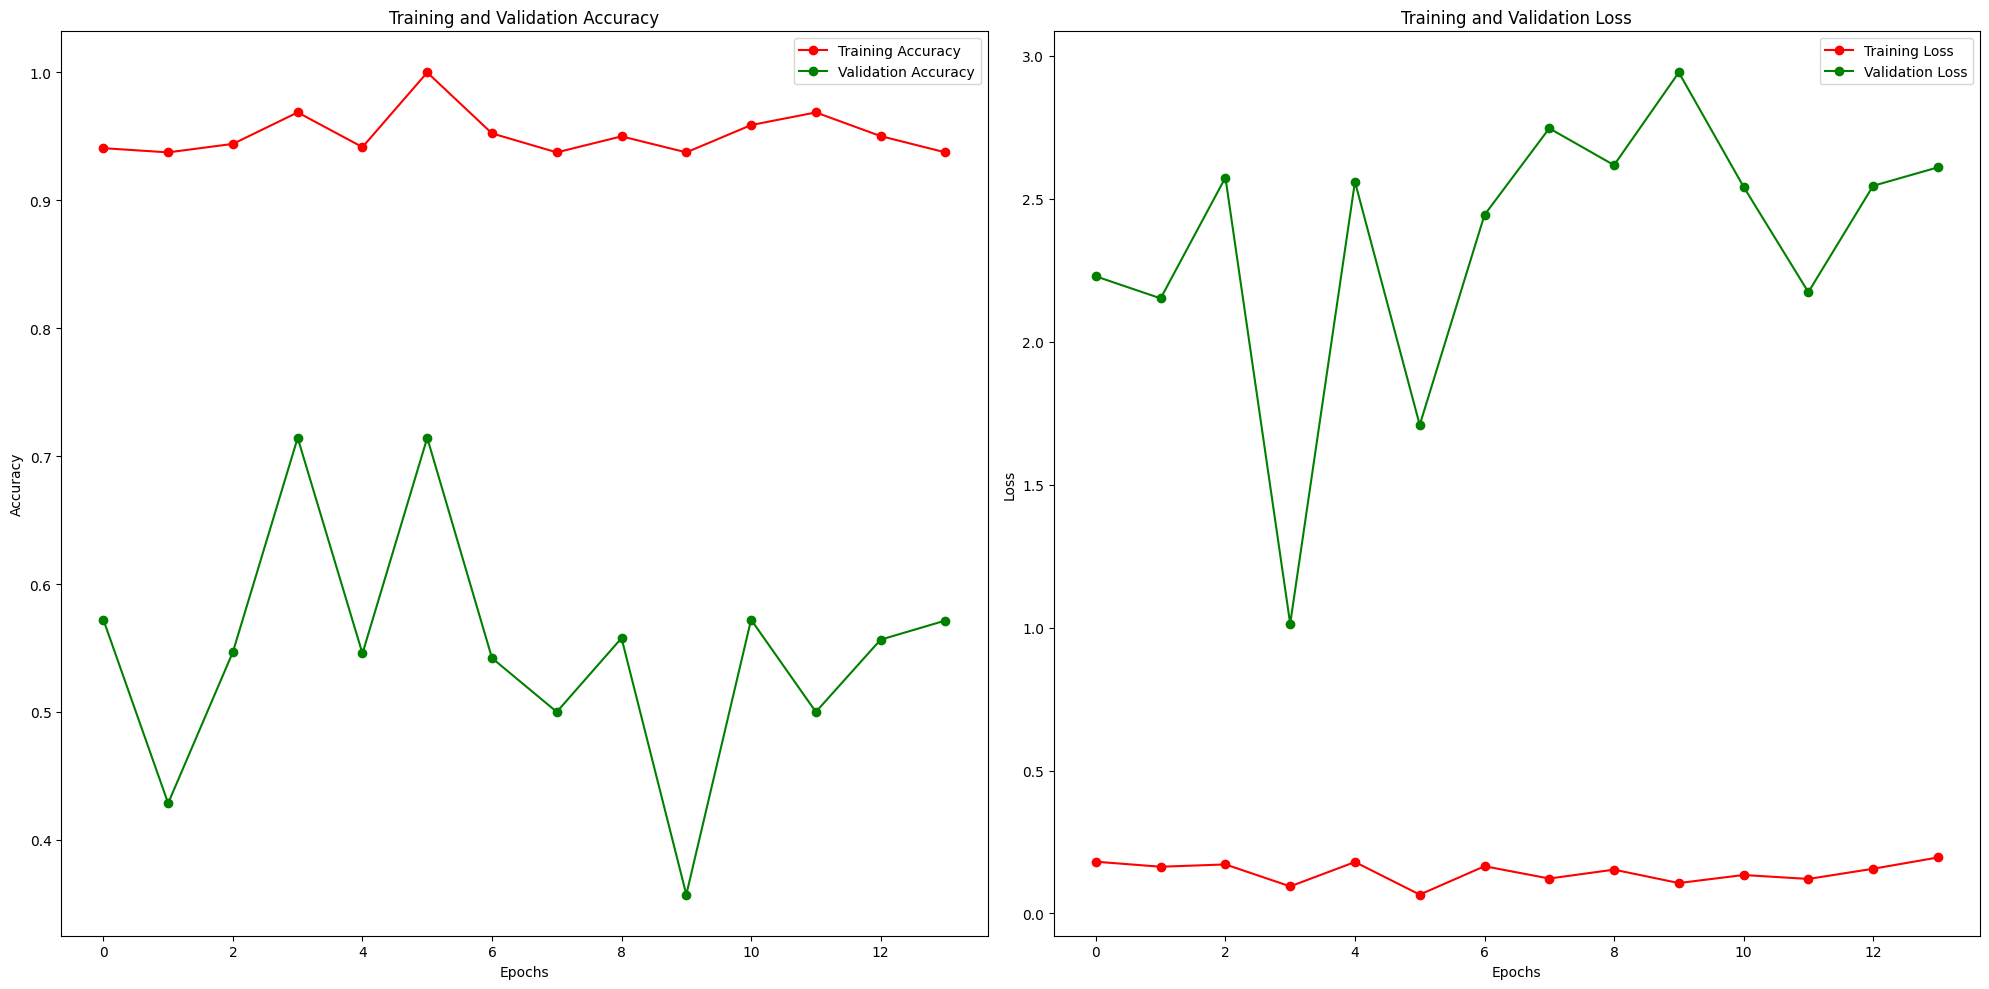

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Visualize Training History
epochs = list(range(len(history2.history['accuracy'])))

# Create a figure with 1 row and 2 columns for Accuracy and Loss plots
fig, ax = plt.subplots(1, 2)

# Extract the relevant metrics from the training history
train_acc = history2.history['accuracy']
train_loss = history2.history['loss']
val_acc = history2.history['val_accuracy']
val_loss = history2.history['val_loss']

# Set the figure size
fig.set_size_inches(20, 10)

# Plot Training and Validation Accuracy
ax[0].plot(epochs, train_acc, 'go-', color='r', label='Training Accuracy')
ax[0].plot(epochs, val_acc, 'go-', label='Validation Accuracy')
ax[0].set_title('Training and Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

# Plot Training and Validation Loss
ax[1].plot(epochs, train_loss, 'g-o', color='r', label='Training Loss')
ax[1].plot(epochs, val_loss, 'go-', label='Validation Loss')
ax[1].set_title('Training and Validation Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

# Display the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


27/27 ━━━━━━━━━━━━━━━━━━━━ 19s 595ms/step


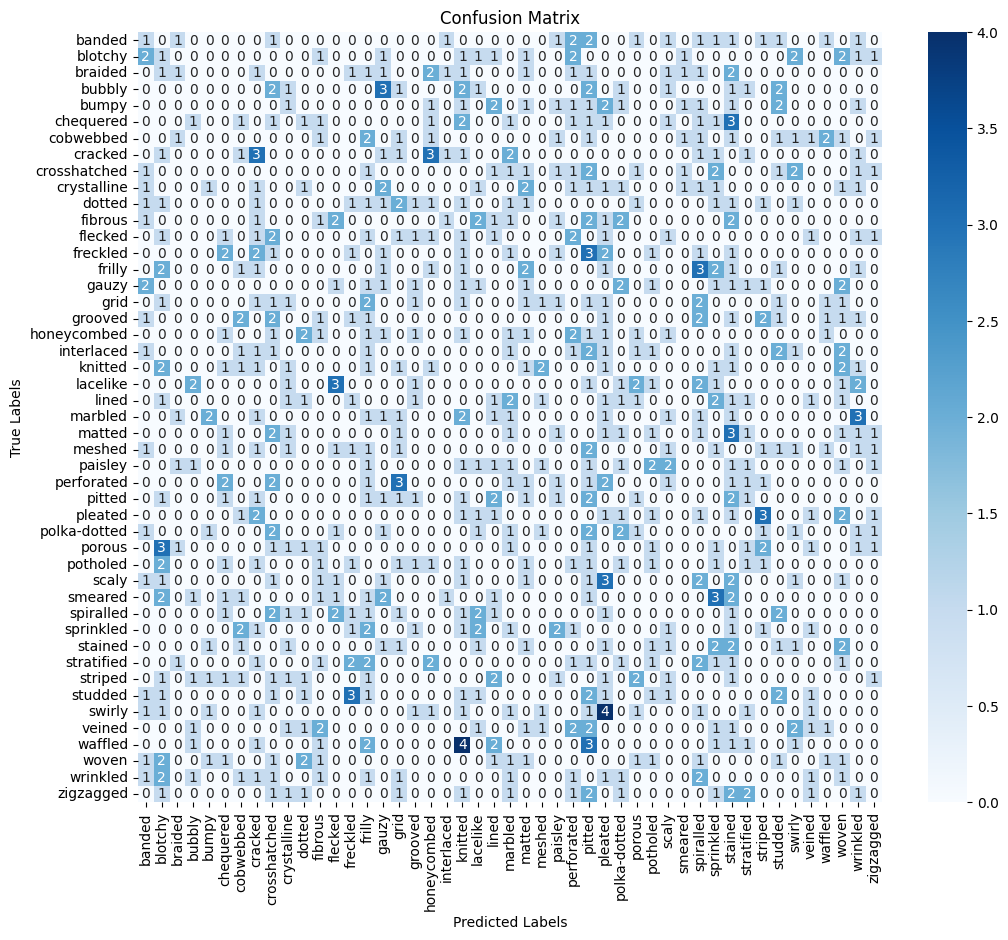

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 2: Generate Predictions for the Confusion Matrix
# Predict the classes for the validation dataset
y_pred = model_ResNet50_2.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the index of the highest probability

# Get the true labels
y_true = validation_generator.classes  # True labels from the validation generator

# Get the class names in the order that Keras uses internally
class_names = list(validation_generator.class_indices.keys())

# Create a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# DeepTEN (Texture Encoding Network)

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision.transforms import RandomAffine, RandomPerspective, RandomResizedCrop, ColorJitter, RandomGrayscale
from tqdm import tqdm
from torch.optim.lr_scheduler import StepLR
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms

class DTDDataset(Dataset):
    """Custom Dataset for DTD (Describable Textures Dataset)"""
    def __init__(self, img_dir, file_labels, transform=None):
        """
        Args:
            img_dir (string): Directory with all the images
            file_labels (list): List of (file_path, label) tuples
            transform (callable, optional): Optional transform to be applied on an image
        """
        self.img_dir = img_dir
        self.file_labels = file_labels
        self.transform = transform

    def __len__(self):
        return len(self.file_labels)

    def __getitem__(self, idx):
        img_path, label = self.file_labels[idx]
        # Construct full image path
        full_path = os.path.join(self.img_dir, img_path)

        try:
            image = Image.open(full_path).convert('RGB')
        except Exception as e:
            print(f"Error loading image {full_path}: {e}")
            # Return a dummy image in case of error
            image = Image.new('RGB', (224, 224))

        if self.transform:
            image = self.transform(image)

        return image, label

class TextureClassifier:
    def __init__(self, num_classes=5, batch_size=32, learning_rate=0.001, categories=None):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.batch_size = batch_size

        # All available DTD categories
        self.all_categories = [
            'banded', 'blotchy', 'braided', 'bubbly', 'bumpy', 'chequered',
            'cobwebbed', 'cracked', 'crosshatched', 'crystalline', 'dotted',
            'fibrous', 'flecked', 'freckled', 'frilly', 'gauzy', 'grid',
            'grooved', 'honeycombed', 'interlaced', 'knitted', 'lacelike',
            'lined', 'marbled', 'matted', 'meshed', 'paisley', 'perforated',
            'pitted', 'pleated', 'polka-dotted', 'porous', 'potholed',
            'scaly', 'smeared', 'spiralled', 'sprinkled', 'stained',
            'stratified', 'striped', 'studded', 'swirly', 'veined',
            'waffled', 'woven', 'wrinkled', 'zigzagged'
        ]

        # Set categories based on input
        if categories is None:
            # If no categories specified, use first num_classes categories
            self.class_names = self.all_categories[:num_classes]
        elif isinstance(categories, int):
            # If number specified, use that many categories
            self.class_names = self.all_categories[:categories]
        else:
            # If specific categories provided, use those
            self.class_names = [cat for cat in categories if cat in self.all_categories]

        self.num_classes = len(self.class_names)

        # Enhanced data transforms with stronger augmentation
        self.train_transform = transforms.Compose([
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomRotation(15),
            transforms.ColorJitter(
                brightness=0.2,
                contrast=0.2,
                saturation=0.2,
                hue=0.1
                ),
            transforms.Resize((256, 256)),  # Resize larger for RandomResizedCrop
            transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
            transforms.RandomVerticalFlip(p=0.3),
            # transforms.RandomAffine(
            #     degrees=30,
            #     translate=(0.1, 0.1),
            #     scale=(0.8, 1.2),
            #     shear=15
            # ),
            # transforms.RandomPerspective(distortion_scale=0.2, p=0.5),
            transforms.RandomGrayscale(p=0.1),
            transforms.ToTensor(),
            transforms.Normalize(
               mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]
           )
        ])

        # Keep validation transform the same
        self.val_transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]
            )
        ])

        # Initialize models
        self.base_model = self._init_model(linear_head=False)
        self.model = self._init_model(linear_head=True)
        self.criterion = nn.CrossEntropyLoss()

        # Only optimize the linear head parameters
        self.optimizer = optim.Adam(self.model.fc.parameters(), lr=learning_rate, weight_decay=1e-4)

        # Define learning rate scheduler
        self.scheduler = StepLR(self.optimizer, step_size=5, gamma=0.1)

    def _init_model(self, linear_head=True):
        """Initialize model with option for linear fine-tuning."""
        model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)

        # Freeze all parameters
        for param in model.parameters():
            param.requires_grad = False

        # Replace the final layer
        model.fc = nn.Linear(model.fc.in_features, self.num_classes)

        if linear_head:
            # Only enable gradient for the linear head
            for param in model.fc.parameters():
                param.requires_grad = True

        return model.to(self.device)

    def load_data(self, data_root):
        """Load DTD dataset with subset of categories."""
        img_dir = os.path.join(data_root, 'images')

        self.class_names = [cls for cls in self.class_names if os.path.exists(os.path.join(img_dir, cls))]
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.class_names)}

        def get_label_data(label_file):
            data = []
            try:
                with open(os.path.join(data_root, 'labels', label_file), 'r') as f:
                    for line in f:
                        img_path = line.strip()
                        category = img_path.split('/')[0]
                        # Only include images from our subset of categories
                        if category in self.class_to_idx:
                            label = self.class_to_idx[category]
                            data.append((img_path, label))
            except FileNotFoundError:
                print(f"Warning: {label_file} not found")
                return []
            return data

        # Create datasets with subset of categories
        train_data = DTDDataset(
            img_dir=img_dir,
            file_labels=get_label_data('train1.txt'),
            transform=self.train_transform
        )

        val_data = DTDDataset(
            img_dir=img_dir,
            file_labels=get_label_data('val1.txt'),
            transform=self.val_transform
        )

        test_data = DTDDataset(
            img_dir=img_dir,
            file_labels=get_label_data('test1.txt'),
            transform=self.val_transform
        )

        self.train_loader = DataLoader(
            train_data,
            batch_size=self.batch_size,
            shuffle=True,
            num_workers=4
        )

        self.val_loader = DataLoader(
            val_data,
            batch_size=self.batch_size,
            shuffle=False,
            num_workers=4
        )

        self.test_loader = DataLoader(
            test_data,
            batch_size=self.batch_size,
            shuffle=False,
            num_workers=4
        )

        print(f"Using {len(self.class_names)} categories: {self.class_names}")
        print(f"Dataset sizes - Train: {len(train_data)}, Val: {len(val_data)}, Test: {len(test_data)}")

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.models import resnet50, resnet101, resnet152

class Encoding(nn.Module):
    """Encoding Layer with residuals."""
    def __init__(self, D, K):
        super(Encoding, self).__init__()
        self.D, self.K = D, K
        self.codewords = nn.Parameter(torch.randn(K, D))
        self.scale = nn.Parameter(torch.randn(K))

    def forward(self, x):
        B, C, H, W = x.size()
        x = x.view(B, C, H * W).permute(0, 2, 1)  # B x N x D
        s = torch.matmul(x, self.codewords.t()) + self.scale  # B x N x K
        a = F.softmax(s, dim=-1)  # B x N x K
        E = torch.matmul(a.permute(0, 2, 1), x)  # B x K x D
        residual = E - self.codewords
        return residual.view(B, -1)

class View(nn.Module):
    """Reshape Layer."""
    def __init__(self, *shape):
        super(View, self).__init__()
        self.shape = shape

    def forward(self, x):
        return x.view(self.shape)

class Normalize(nn.Module):
    """Feature Normalization Layer."""
    def forward(self, x):
        return F.normalize(x, p=2, dim=1)

class DeepTen(nn.Module):
    def __init__(self, nclass, backbone='resnet50'):
        super(DeepTen, self).__init__()
        self.backbone = backbone
        # Load ResNet backbone
        if self.backbone == 'resnet50':
            resnet = resnet50(pretrained=True)
        elif self.backbone == 'resnet101':
            resnet = resnet101(pretrained=True)
        elif self.backbone == 'resnet152':
            resnet = resnet152(pretrained=True)
        else:
            raise RuntimeError('Unknown backbone: {}'.format(self.backbone))

        # Use ResNet as feature extractor
        self.layer0 = nn.Sequential(resnet.conv1, resnet.bn1, resnet.relu, resnet.maxpool)
        self.layer1 = resnet.layer1
        self.layer2 = resnet.layer2
        self.layer3 = resnet.layer3
        self.layer4 = resnet.layer4

        # Texture Encoding Head
        n_codes = 32
        self.head = nn.Sequential(
            nn.Conv2d(2048, 128, kernel_size=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            Encoding(D=128, K=n_codes),
            View(-1, 128 * n_codes),
            Normalize(),
            nn.Linear(128 * n_codes, nclass),
        )

    def forward(self, x):
        x = self.layer0(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.head(x)
        return x

def get_deepten(nclass=47, backbone='resnet50'):
    """
    Returns a DeepTEN model with the specified backbone.
    Parameters:
        nclass (int): Number of output classes.
        backbone (str): Backbone architecture ('resnet50', 'resnet101', 'resnet152').
    Returns:
        DeepTen: The DeepTEN model.
    """
    return DeepTen(nclass, backbone)

# Example usage:
if __name__ == "__main__":
    model = get_deepten(nclass=47, backbone='resnet50')
    print(model)
    x = torch.randn(2, 3, 224, 224)  # Example input
    output = model(x)
    print(output.shape)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 116MB/s]


DeepTen(
  (layer0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_si

In [ ]:
from tqdm import tqdm

def train_deepten_model(data_root, num_epochs=25, learning_rate=0.001, backbone='resnet50', batch_size=32, categories=None):
    """
    Train the DeepTEN model on the DTD dataset.

    Args:
        data_root (str): Path to the DTD dataset root.
        num_epochs (int): Number of training epochs.
        learning_rate (float): Learning rate for optimizer.
        backbone (str): Backbone network ('resnet50', 'resnet101', 'resnet152').
        batch_size (int): Batch size for training and validation.
        categories (list or int, optional): Categories to include in training.
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Handle categories
    if isinstance(categories, int):  # If it's an integer, take the first `categories` classes
        categories_list = None
    else:  # If it's a list or None, use it directly
        categories_list = categories

    # Initialize dataset and dataloaders
    texture_classifier = TextureClassifier(
        num_classes=len(categories_list) if categories_list else categories,
        batch_size=batch_size,
        learning_rate=learning_rate,
        categories=categories_list
    )
    texture_classifier.load_data(data_root)

    train_loader = texture_classifier.train_loader
    val_loader = texture_classifier.val_loader

    # Initialize DeepTEN model
    num_classes = len(texture_classifier.class_names)
    model = get_deepten(nclass=num_classes, backbone=backbone).to(device)

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Learning rate scheduler
    scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

    # Training and validation loop
    best_val_accuracy = 0.0
    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        print("-" * 30)

        # Training phase
        model.train()
        running_loss = 0.0
        correct_preds = 0
        total_samples = 0

        for inputs, labels in tqdm(train_loader, desc="Training", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct_preds += (preds == labels).sum().item()
            total_samples += labels.size(0)

        train_loss = running_loss / total_samples
        train_accuracy = correct_preds / total_samples

        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_samples = 0

        with torch.no_grad():
            for inputs, labels in tqdm(val_loader, desc="Validation", leave=False):
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_correct += (preds == labels).sum().item()
                val_samples += labels.size(0)

        val_loss = val_loss / val_samples
        val_accuracy = val_correct / val_samples

        print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

        # Save best model
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            torch.save(model.state_dict(), "best_deepten_model.pth")
            print("Saved Best Model!")

        # Update learning rate
        scheduler.step()

    print(f"Training complete. Best validation accuracy: {best_val_accuracy:.4f}")

In [ ]:
if __name__ == "__main__":
    DATA_ROOT = "/content/dtd"  # Replace with your DTD dataset root

    # Print a header for clarity
    print("Training DeepTEN Model\n")
    print(f"Dataset Path: {DATA_ROOT}")
    print(f"Backbone: ResNet152, Categories: 47, Epochs: 20, Batch Size: 32\n")
    print("-" * 50)

    # Call the training function
    train_deepten_model(
        data_root=DATA_ROOT,
        num_epochs=20,
        learning_rate=0.001,
        backbone="resnet152",
        batch_size=32,
        categories=47  # Number of categories or list of specific categories
    )

    # Notify when training finishes
    print("\nTraining Completed! Check saved models for best performance.")


Training DeepTEN Model

Dataset Path: /content/dtd
Backbone: ResNet152, Categories: 47, Epochs: 20, Batch Size: 32

--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResN

Using 47 categories: ['banded', 'blotchy', 'braided', 'bubbly', 'bumpy', 'chequered', 'cobwebbed', 'cracked', 'crosshatched', 'crystalline', 'dotted', 'fibrous', 'flecked', 'freckled', 'frilly', 'gauzy', 'grid', 'grooved', 'honeycombed', 'interlaced', 'knitted', 'lacelike', 'lined', 'marbled', 'matted', 'meshed', 'paisley', 'perforated', 'pitted', 'pleated', 'polka-dotted', 'porous', 'potholed', 'scaly', 'smeared', 'spiralled', 'sprinkled', 'stained', 'stratified', 'striped', 'studded', 'swirly', 'veined', 'waffled', 'woven', 'wrinkled', 'zigzagged']
Dataset sizes - Train: 1880, Val: 1880, Test: 1880


Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:01<00:00, 175MB/s]


Epoch 1/20
------------------------------


Train Loss: 3.8509, Train Accuracy: 0.0191


Val Loss: 3.8432, Val Accuracy: 0.0367
Saved Best Model!
Epoch 2/20
------------------------------


Train Loss: 3.8321, Train Accuracy: 0.0346


Val Loss: 3.8147, Val Accuracy: 0.0287
Epoch 3/20
------------------------------


Train Loss: 3.7951, Train Accuracy: 0.0500


Val Loss: 3.7642, Val Accuracy: 0.0521
Saved Best Model!
Epoch 4/20
------------------------------


Train Loss: 3.7507, Train Accuracy: 0.0527


Val Loss: 3.7458, Val Accuracy: 0.0527
Saved Best Model!
Epoch 5/20
------------------------------


Train Loss: 3.7298, Train Accuracy: 0.0516


Val Loss: 3.7043, Val Accuracy: 0.0638
Saved Best Model!
Epoch 6/20
------------------------------


Train Loss: 3.6860, Train Accuracy: 0.0660


Val Loss: 3.6861, Val Accuracy: 0.0628
Epoch 7/20
------------------------------


Train Loss: 3.6669, Train Accuracy: 0.0718


Val Loss: 3.6729, Val Accuracy: 0.0691
Saved Best Model!
Epoch 8/20
------------------------------


Train Loss: 3.6582, Train Accuracy: 0.0707


Val Loss: 3.6666, Val Accuracy: 0.0707
Saved Best Model!
Epoch 9/20
------------------------------


Train Loss: 3.6456, Train Accuracy: 0.0654


Val Loss: 3.6531, Val Accuracy: 0.0755
Saved Best Model!
Epoch 10/20
------------------------------


Train Loss: 3.6364, Train Accuracy: 0.0713


Val Loss: 3.6505, Val Accuracy: 0.0686
Epoch 11/20
------------------------------


Train Loss: 3.6273, Train Accuracy: 0.0761


Val Loss: 3.6478, Val Accuracy: 0.0702
Epoch 12/20
------------------------------


Train Loss: 3.6342, Train Accuracy: 0.0755


Val Loss: 3.6465, Val Accuracy: 0.0681
Epoch 13/20
------------------------------


Train Loss: 3.6252, Train Accuracy: 0.0739


Val Loss: 3.6453, Val Accuracy: 0.0676
Epoch 14/20
------------------------------


Train Loss: 3.6252, Train Accuracy: 0.0713


Val Loss: 3.6411, Val Accuracy: 0.0723
Epoch 15/20
------------------------------


Train Loss: 3.6303, Train Accuracy: 0.0766


Val Loss: 3.6392, Val Accuracy: 0.0686
Epoch 16/20
------------------------------


Train Loss: 3.6273, Train Accuracy: 0.0787


Val Loss: 3.6410, Val Accuracy: 0.0718
Epoch 17/20
------------------------------


Train Loss: 3.6219, Train Accuracy: 0.0702


Val Loss: 3.6391, Val Accuracy: 0.0729
Epoch 18/20
------------------------------


Train Loss: 3.6190, Train Accuracy: 0.0761


Val Loss: 3.6412, Val Accuracy: 0.0676
Epoch 19/20
------------------------------


Train Loss: 3.6273, Train Accuracy: 0.0777


Val Loss: 3.6393, Val Accuracy: 0.0676
Epoch 20/20
------------------------------


Train Loss: 3.6147, Train Accuracy: 0.0814


Val Loss: 3.6417, Val Accuracy: 0.0723
Training complete. Best validation accuracy: 0.0755

Training Completed! Check saved models for best performance.


Testing DeepTEN Model with Evaluation Metrics

Dataset Path: /content/dtd
Backbone: ResNet152, Categories: 47, Batch Size: 32

--------------------------------------------------


<ipython-input-9-ca8335a0cf11>:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Using 47 categories: ['banded', 'blotchy', 'braided', 'bubbly', 'bumpy', 'chequered', 'cobwebbed', 'cracked', 'crosshatched', 'crystalline', 'dotted', 'fibrous', 'flecked', 'freckled', 'frilly', 'gauzy', 'grid', 'grooved', 'honeycombed', 'interlaced', 'knitted', 'lacelike', 'lined', 'marbled', 'matted', 'meshed', 'paisley', 'perforated', 'pitted', 'pleated', 'polka-dotted', 'porous', 'potholed', 'scaly', 'smeared', 'spiralled', 'sprinkled', 'stained', 'stratified', 'striped', 'studded', 'swirly', 'veined', 'waffled', 'woven', 'wrinkled', 'zigzagged']
Dataset sizes - Train: 1880, Val: 1880, Test: 1880


Testing: 100%|██████████| 59/59 [00:15<00:00,  3.72it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.0739
Precision: 0.0219
Recall: 0.0739
F1-Score: 0.0292


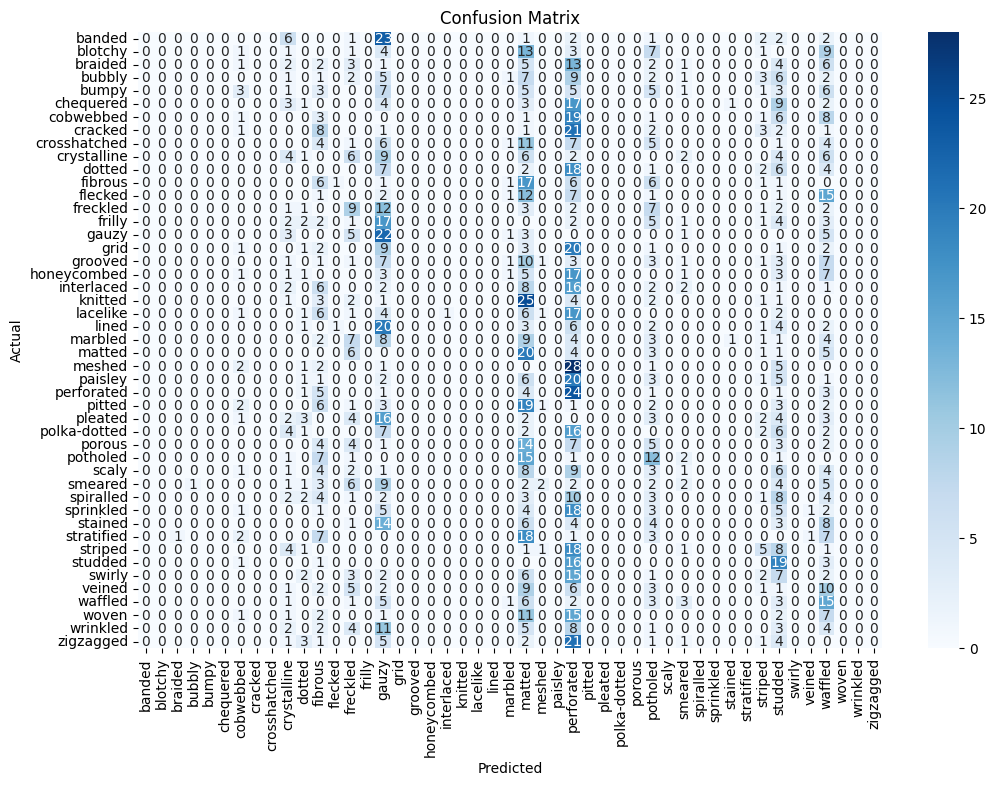

In [ ]:
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

def evaluate_model(model, test_loader, device):
    """
    Evaluate the DeepTEN model on the test dataset and calculate performance metrics.

    Args:
        model (nn.Module): The trained DeepTEN model.
        test_loader (DataLoader): DataLoader for the test dataset.
        device (torch.device): Device to run the evaluation (CPU or GPU).

    Returns:
        dict: Dictionary containing accuracy, precision, recall, F1-score, and confusion matrix.
    """
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc="Testing"):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='macro')
    cm = confusion_matrix(all_labels, all_preds)

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "confusion_matrix": cm
    }

def plot_confusion_matrix(cm, class_names):
    """
    Plot the confusion matrix using Seaborn's heatmap.

    Args:
        cm (array): Confusion matrix.
        class_names (list): List of class names.
    """
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

def test_deepten_model(data_root, model_path, backbone='resnet50', batch_size=32):
    """
    Test the DeepTEN model and display evaluation metrics.

    Args:
        data_root (str): Path to the DTD dataset root.
        model_path (str): Path to the saved model file.
        backbone (str): Backbone architecture ('resnet50', 'resnet101', 'resnet152').
        batch_size (int): Batch size for testing.
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Load the saved model
    num_classes = 47  # Adjust according to your dataset
    model = get_deepten(nclass=num_classes, backbone=backbone)
    model.load_state_dict(torch.load(model_path))
    model = model.to(device)

    # Initialize dataset and DataLoader
    texture_classifier = TextureClassifier(
        num_classes=num_classes,
        batch_size=batch_size,
        categories=None
    )
    texture_classifier.load_data(data_root)
    test_loader = texture_classifier.test_loader

    # Evaluate the model
    metrics = evaluate_model(model, test_loader, device)

    # Display the metrics
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-Score: {metrics['f1']:.4f}")

    # Plot the confusion matrix
    class_names = texture_classifier.class_names
    plot_confusion_matrix(metrics['confusion_matrix'], class_names)

if __name__ == "__main__":
    DATA_ROOT = "/content/dtd"  # Update this path as needed
    MODEL_PATH = "best_deepten_model.pth"  # Path to your saved model

    print("Testing DeepTEN Model with Evaluation Metrics\n")
    print(f"Dataset Path: {DATA_ROOT}")
    print(f"Backbone: ResNet152, Categories: 47, Batch Size: 32\n")
    print("-" * 50)

    # Test the model and evaluate
    test_deepten_model(
        data_root=DATA_ROOT,
        model_path=MODEL_PATH,
        backbone="resnet152",
        batch_size=32
    )


# DeepTEN with Heavier Data Augmentation

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision.transforms import RandomAffine, RandomPerspective, RandomResizedCrop, ColorJitter, RandomGrayscale
from tqdm import tqdm
from torch.optim.lr_scheduler import StepLR

class DTDDataset(Dataset):
    """Custom Dataset for DTD (Describable Textures Dataset)"""
    def __init__(self, img_dir, transform=None):
        """
        Args:
            img_dir (string): Directory with all the images
            transform (callable, optional): Optional transform to be applied on an image
        """
        self.img_dir = img_dir
        self.transform = transform
        # List all categories (subdirectories)
        self.classes = os.listdir(img_dir)
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}
        self.img_paths = []

        # Collect all image paths and their corresponding labels
        for cls in self.classes:
            class_folder = os.path.join(img_dir, cls)
            if os.path.isdir(class_folder):
                for img_name in os.listdir(class_folder):
                    if img_name.endswith('.jpg') or img_name.endswith('.png'):
                        self.img_paths.append((os.path.join(cls, img_name), self.class_to_idx[cls]))

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        img_path, label = self.img_paths[idx]
        full_path = os.path.join(self.img_dir, img_path)

        try:
            image = Image.open(full_path).convert('RGB')
        except Exception as e:
            print(f"Error loading image {full_path}: {e}")
            # Return a dummy image in case of error
            image = Image.new('RGB', (224, 224))

        if self.transform:
            image = self.transform(image)

        return image, label

class TextureClassifier:
    def __init__(self, num_classes=5, batch_size=32, learning_rate=0.001, categories=None):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.batch_size = batch_size

        # All available DTD categories
        self.all_categories = [
            'banded', 'blotchy', 'braided', 'bubbly', 'bumpy', 'chequered',
            'cobwebbed', 'cracked', 'crosshatched', 'crystalline', 'dotted',
            'fibrous', 'flecked', 'freckled', 'frilly', 'gauzy', 'grid',
            'grooved', 'honeycombed', 'interlaced', 'knitted', 'lacelike',
            'lined', 'marbled', 'matted', 'meshed', 'paisley', 'perforated',
            'pitted', 'pleated', 'polka-dotted', 'porous', 'potholed',
            'scaly', 'smeared', 'spiralled', 'sprinkled', 'stained',
            'stratified', 'striped', 'studded', 'swirly', 'veined',
            'waffled', 'woven', 'wrinkled', 'zigzagged'
        ]

        # Set categories based on input
        if categories is None:
            # If no categories specified, use first num_classes categories
            self.class_names = self.all_categories[:num_classes]
        elif isinstance(categories, int):
            # If number specified, use that many categories
            self.class_names = self.all_categories[:categories]
        else:
            # If specific categories provided, use those
            self.class_names = [cat for cat in categories if cat in self.all_categories]

        self.num_classes = len(self.class_names)

        # Enhanced data transforms with stronger augmentation
        self.train_transform = transforms.Compose([
            transforms.RandomHorizontalFlip(p=0.5),  # Random horizontal flip with 50% probability
            transforms.RandomRotation(15),  # Random rotation by 15 degrees
            transforms.ColorJitter(
                brightness=0.2,
                contrast=0.2,
                saturation=0.2,
                hue=0.1
            ),  # Random color jittering for brightness, contrast, saturation, and hue
            transforms.Resize((256, 256)),  # Resize image to larger size
            transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  # Random crop and resize
            transforms.RandomVerticalFlip(p=0.3),  # Random vertical flip with 30% probability
            transforms.RandomAffine(
                degrees=30,  # Random affine transformation (rotation, scaling, translation, shear)
                translate=(0.1, 0.1),
                scale=(0.8, 1.2),
                shear=15
            ),
            transforms.RandomPerspective(distortion_scale=0.2, p=0.5),  # Random perspective distortion
            transforms.RandomGrayscale(p=0.1),  # Random grayscale with 10% probability
            transforms.ToTensor(),  # Convert image to tensor
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],  # Normalize based on ImageNet mean values
                std=[0.229, 0.224, 0.225]
            )
        ])

        # Keep validation transform the same
        self.val_transform = transforms.Compose([
            transforms.Resize((224, 224)),  # Resize for validation set
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]
            )
        ])

        # Initialize models
        self.base_model = self._init_model(linear_head=False)
        self.model = self._init_model(linear_head=True)
        self.criterion = nn.CrossEntropyLoss()

        # Only optimize the linear head parameters
        self.optimizer = optim.Adam(self.model.fc.parameters(), lr=learning_rate, weight_decay=1e-4)

        # Define learning rate scheduler
        self.scheduler = StepLR(self.optimizer, step_size=5, gamma=0.1)

    def _init_model(self, linear_head=True):
        """Initialize model with option for linear fine-tuning."""
        model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)

        # Freeze all parameters
        for param in model.parameters():
            param.requires_grad = False

        # Replace the final layer
        model.fc = nn.Linear(model.fc.in_features, self.num_classes)

        if linear_head:
            # Only enable gradient for the linear head
            for param in model.fc.parameters():
                param.requires_grad = True

        return model.to(self.device)

    def load_data(self, data_root):
        """Load DTD dataset with subset of categories."""
        img_dir = os.path.join(data_root, 'images')

        self.class_names = [cls for cls in self.class_names if os.path.exists(os.path.join(img_dir, cls))]
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.class_names)}

        def get_label_data(label_file):
            data = []
            try:
                with open(os.path.join(data_root, 'labels', label_file), 'r') as f:
                    for line in f:
                        img_path = line.strip()
                        category = img_path.split('/')[0]
                        # Only include images from our subset of categories
                        if category in self.class_to_idx:
                            label = self.class_to_idx[category]
                            data.append((img_path, label))
            except FileNotFoundError:
                print(f"Warning: {label_file} not found")
                return []
            return data

        # Create datasets with subset of categories
        train_data = DTDDataset(
            img_dir=img_dir,
            transform=self.train_transform
        )

        val_data = DTDDataset(
            img_dir=img_dir,
            transform=self.val_transform
        )

        test_data = DTDDataset(
            img_dir=img_dir,
            transform=self.val_transform
        )

        self.train_loader = DataLoader(
            train_data,
            batch_size=self.batch_size,
            shuffle=True,
            num_workers=4
        )

        self.val_loader = DataLoader(
            val_data,
            batch_size=self.batch_size,
            shuffle=False,
            num_workers=4
        )

        self.test_loader = DataLoader(
            test_data,
            batch_size=self.batch_size,
            shuffle=False,
            num_workers=4
        )

        print(f"Using {len(self.class_names)} categories: {self.class_names}")
        print(f"Dataset sizes - Train: {len(train_data)}, Val: {len(val_data)}, Test: {len(test_data)}")


In [ ]:
from tqdm import tqdm

def train_deepten_model(data_root, num_epochs=25, learning_rate=0.001, backbone='resnet50', batch_size=32, categories=None):
    """
    Train the DeepTEN model on the DTD dataset.

    Args:
        data_root (str): Path to the DTD dataset root.
        num_epochs (int): Number of training epochs.
        learning_rate (float): Learning rate for optimizer.
        backbone (str): Backbone network ('resnet50', 'resnet101', 'resnet152').
        batch_size (int): Batch size for training and validation.
        categories (list or int, optional): Categories to include in training.
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Handle categories
    if isinstance(categories, int):  # If it's an integer, take the first `categories` classes
        categories_list = None
    else:  # If it's a list or None, use it directly
        categories_list = categories

    # Initialize dataset and dataloaders
    texture_classifier = TextureClassifier(
        num_classes=len(categories_list) if categories_list else categories,
        batch_size=batch_size,
        learning_rate=learning_rate,
        categories=categories_list
    )
    texture_classifier.load_data(data_root)

    train_loader = texture_classifier.train_loader
    val_loader = texture_classifier.val_loader

    # Initialize DeepTEN model
    num_classes = len(texture_classifier.class_names)
    model = get_deepten(nclass=num_classes, backbone=backbone).to(device)

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Learning rate scheduler
    scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

    # Training and validation loop
    best_val_accuracy = 0.0
    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        print("-" * 30)

        # Training phase
        model.train()
        running_loss = 0.0
        correct_preds = 0
        total_samples = 0

        for inputs, labels in tqdm(train_loader, desc="Training", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct_preds += (preds == labels).sum().item()
            total_samples += labels.size(0)

        train_loss = running_loss / total_samples
        train_accuracy = correct_preds / total_samples

        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_samples = 0

        with torch.no_grad():
            for inputs, labels in tqdm(val_loader, desc="Validation", leave=False):
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_correct += (preds == labels).sum().item()
                val_samples += labels.size(0)

        val_loss = val_loss / val_samples
        val_accuracy = val_correct / val_samples

        print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

        # Save best model
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            torch.save(model.state_dict(), "best_deepten_model2.pth")
            print("Saved Best Model!")

        # Update learning rate
        scheduler.step()

    print(f"Training complete. Best validation accuracy: {best_val_accuracy:.4f}")

In [ ]:
if __name__ == "__main__":
    DATA_ROOT = "/content/dtd"  # Replace with your DTD dataset root

    # Print a header for clarity
    print("Training DeepTEN Model\n")
    print(f"Dataset Path: {DATA_ROOT}")
    print(f"Backbone: ResNet152, Categories: 47, Epochs: 20, Batch Size: 32\n")
    print("-" * 50)

    # Call the training function
    train_deepten_model(
        data_root=DATA_ROOT,
        num_epochs=20,
        learning_rate=0.001,
        backbone="resnet152",
        batch_size=32,
        categories=47  # Number of categories or list of specific categories
    )

    # Notify when training finishes
    print("\nTraining Completed! Check saved models for best performance.")


Training DeepTEN Model

Dataset Path: /content/dtd
Backbone: ResNet152, Categories: 47, Epochs: 20, Batch Size: 32

--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResN

Using 47 categories: ['banded', 'blotchy', 'braided', 'bubbly', 'bumpy', 'chequered', 'cobwebbed', 'cracked', 'crosshatched', 'crystalline', 'dotted', 'fibrous', 'flecked', 'freckled', 'frilly', 'gauzy', 'grid', 'grooved', 'honeycombed', 'interlaced', 'knitted', 'lacelike', 'lined', 'marbled', 'matted', 'meshed', 'paisley', 'perforated', 'pitted', 'pleated', 'polka-dotted', 'porous', 'potholed', 'scaly', 'smeared', 'spiralled', 'sprinkled', 'stained', 'stratified', 'striped', 'studded', 'swirly', 'veined', 'waffled', 'woven', 'wrinkled', 'zigzagged']
Dataset sizes - Train: 5640, Val: 5640, Test: 5640
Epoch 1/20
------------------------------


Train Loss: 3.8478, Train Accuracy: 0.0243


Val Loss: 3.8188, Val Accuracy: 0.0381
Saved Best Model!
Epoch 2/20
------------------------------


Train Loss: 3.8068, Train Accuracy: 0.0358


Val Loss: 3.7612, Val Accuracy: 0.0548
Saved Best Model!
Epoch 3/20
------------------------------


Train Loss: 3.7681, Train Accuracy: 0.0468


Val Loss: 3.7674, Val Accuracy: 0.0434
Epoch 4/20
------------------------------


Train Loss: 3.7365, Train Accuracy: 0.0452


Val Loss: 3.6939, Val Accuracy: 0.0465
Epoch 5/20
------------------------------


Train Loss: 3.7282, Train Accuracy: 0.0511


Val Loss: 3.7685, Val Accuracy: 0.0418
Epoch 6/20
------------------------------


Train Loss: 3.6878, Train Accuracy: 0.0583


Val Loss: 3.6575, Val Accuracy: 0.0599
Saved Best Model!
Epoch 7/20
------------------------------


Train Loss: 3.6695, Train Accuracy: 0.0605


Val Loss: 3.6572, Val Accuracy: 0.0621
Saved Best Model!
Epoch 8/20
------------------------------


Train Loss: 3.6570, Train Accuracy: 0.0649


Val Loss: 3.6278, Val Accuracy: 0.0665
Saved Best Model!
Epoch 9/20
------------------------------


Train Loss: 3.6561, Train Accuracy: 0.0638


Val Loss: 3.6219, Val Accuracy: 0.0663
Epoch 10/20
------------------------------


Train Loss: 3.6446, Train Accuracy: 0.0686


Val Loss: 3.6223, Val Accuracy: 0.0686
Saved Best Model!
Epoch 11/20
------------------------------


Train Loss: 3.6410, Train Accuracy: 0.0644


Val Loss: 3.6121, Val Accuracy: 0.0720
Saved Best Model!
Epoch 12/20
------------------------------


Train Loss: 3.6332, Train Accuracy: 0.0661


Val Loss: 3.6100, Val Accuracy: 0.0727
Saved Best Model!
Epoch 13/20
------------------------------


Train Loss: 3.6322, Train Accuracy: 0.0722


Val Loss: 3.6091, Val Accuracy: 0.0722
Epoch 14/20
------------------------------


Train Loss: 3.6337, Train Accuracy: 0.0709


Val Loss: 3.6062, Val Accuracy: 0.0745
Saved Best Model!
Epoch 15/20
------------------------------


Train Loss: 3.6253, Train Accuracy: 0.0759


Val Loss: 3.5994, Val Accuracy: 0.0762
Saved Best Model!
Epoch 16/20
------------------------------


Train Loss: 3.6303, Train Accuracy: 0.0720


Val Loss: 3.5996, Val Accuracy: 0.0762
Epoch 17/20
------------------------------


Train Loss: 3.6275, Train Accuracy: 0.0727


Val Loss: 3.5968, Val Accuracy: 0.0784
Saved Best Model!
Epoch 18/20
------------------------------


Train Loss: 3.6275, Train Accuracy: 0.0676


Val Loss: 3.5992, Val Accuracy: 0.0762
Epoch 19/20
------------------------------


Train Loss: 3.6256, Train Accuracy: 0.0732


Val Loss: 3.6088, Val Accuracy: 0.0723
Epoch 20/20
------------------------------


Train Loss: 3.6254, Train Accuracy: 0.0757


Val Loss: 3.6074, Val Accuracy: 0.0745
Training complete. Best validation accuracy: 0.0784

Training Completed! Check saved models for best performance.


Testing DeepTEN Model with Evaluation Metrics

Dataset Path: /content/dtd
Backbone: ResNet152, Categories: 47, Batch Size: 32

--------------------------------------------------


<ipython-input-17-97d839708936>:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Using 47 categories: ['banded', 'blotchy', 'braided', 'bubbly', 'bumpy', 'chequered', 'cobwebbed', 'cracked', 'crosshatched', 'crystalline', 'dotted', 'fibrous', 'flecked', 'freckled', 'frilly', 'gauzy', 'grid', 'grooved', 'honeycombed', 'interlaced', 'knitted', 'lacelike', 'lined', 'marbled', 'matted', 'meshed', 'paisley', 'perforated', 'pitted', 'pleated', 'polka-dotted', 'porous', 'potholed', 'scaly', 'smeared', 'spiralled', 'sprinkled', 'stained', 'stratified', 'striped', 'studded', 'swirly', 'veined', 'waffled', 'woven', 'wrinkled', 'zigzagged']
Dataset sizes - Train: 5640, Val: 5640, Test: 5640


Testing: 100%|██████████| 177/177 [00:44<00:00,  3.95it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.0784
Precision: 0.0554
Recall: 0.0784
F1-Score: 0.0382


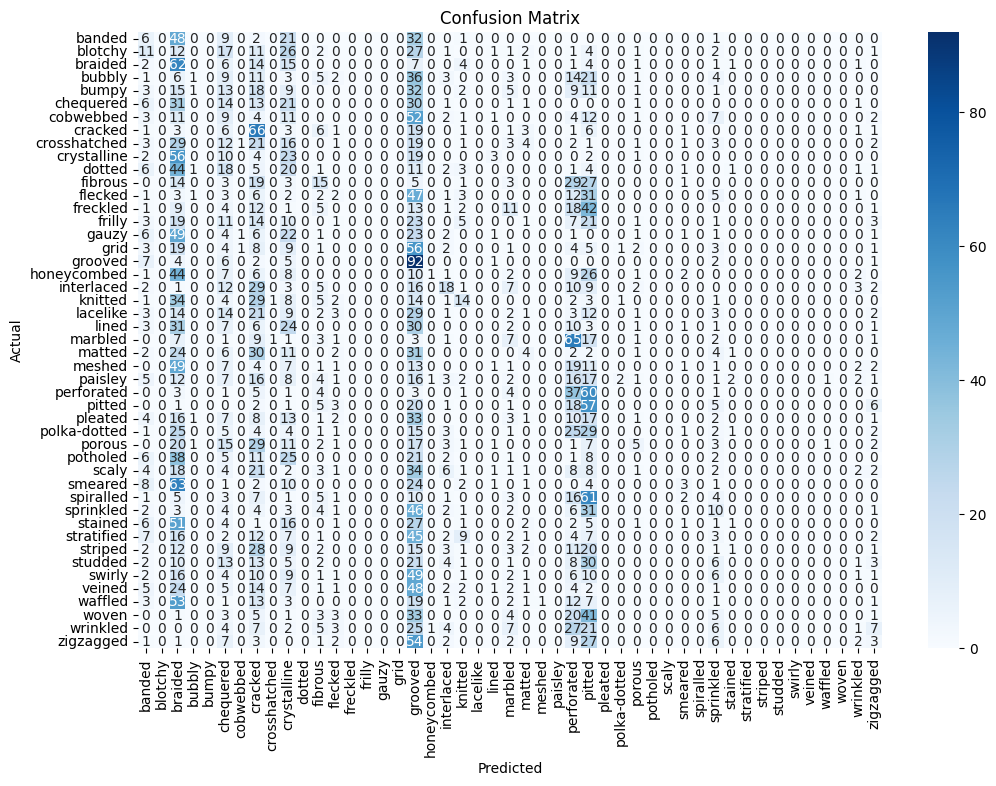

In [ ]:
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

def evaluate_model(model, test_loader, device):
    """
    Evaluate the DeepTEN model on the test dataset and calculate performance metrics.

    Args:
        model (nn.Module): The trained DeepTEN model.
        test_loader (DataLoader): DataLoader for the test dataset.
        device (torch.device): Device to run the evaluation (CPU or GPU).

    Returns:
        dict: Dictionary containing accuracy, precision, recall, F1-score, and confusion matrix.
    """
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc="Testing"):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='macro')
    cm = confusion_matrix(all_labels, all_preds)

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "confusion_matrix": cm
    }

def plot_confusion_matrix(cm, class_names):
    """
    Plot the confusion matrix using Seaborn's heatmap.

    Args:
        cm (array): Confusion matrix.
        class_names (list): List of class names.
    """
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

def test_deepten_model(data_root, model_path, backbone='resnet50', batch_size=32):
    """
    Test the DeepTEN model and display evaluation metrics.

    Args:
        data_root (str): Path to the DTD dataset root.
        model_path (str): Path to the saved model file.
        backbone (str): Backbone architecture ('resnet50', 'resnet101', 'resnet152').
        batch_size (int): Batch size for testing.
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Load the saved model
    num_classes = 47  # Adjust according to your dataset
    model = get_deepten(nclass=num_classes, backbone=backbone)
    model.load_state_dict(torch.load(model_path))
    model = model.to(device)

    # Initialize dataset and DataLoader
    texture_classifier = TextureClassifier(
        num_classes=num_classes,
        batch_size=batch_size,
        categories=None
    )
    texture_classifier.load_data(data_root)
    test_loader = texture_classifier.test_loader

    # Evaluate the model
    metrics = evaluate_model(model, test_loader, device)

    # Display the metrics
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-Score: {metrics['f1']:.4f}")

    # Plot the confusion matrix
    class_names = texture_classifier.class_names
    plot_confusion_matrix(metrics['confusion_matrix'], class_names)

if __name__ == "__main__":
    DATA_ROOT = "/content/dtd"  # Update this path as needed
    MODEL_PATH = "best_deepten_model2.pth"  # Path to your saved model

    print("Testing DeepTEN Model with Evaluation Metrics\n")
    print(f"Dataset Path: {DATA_ROOT}")
    print(f"Backbone: ResNet152, Categories: 47, Batch Size: 32\n")
    print("-" * 50)

    # Test the model and evaluate
    test_deepten_model(
        data_root=DATA_ROOT,
        model_path=MODEL_PATH,
        backbone="resnet152",
        batch_size=32
    )


#StreamLit

In [ ]:
!pip install streamlit pyngrok --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.7 MB/s eta 0:00:00


In [ ]:
# Write the Streamlit app code to a file
with open("/content/app.py", "w") as f:
    f.write('''import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
import streamlit as st
from torchvision import models, transforms
import torch.nn as nn
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import copy
import torch
import torch.nn as nn
from typing import Optional, Union, List, Tuple
import copy

class TangentTaskVector:
    """Implementation of task vectors in the tangent space for model editing."""

    def __init__(
        self,
        base_model: nn.Module,
        finetuned_model: nn.Module,
        device: Optional[torch.device] = None
    ):
        """Initialize a task vector from base and finetuned models.

        Args:
            base_model: The pre-trained model
            finetuned_model: The fine-tuned model
            device: Device to store the vector on
        """
        self.device = device or torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.vector = {}

        # Compute the task vector as difference in tangent space
        with torch.no_grad():
            base_params = dict(base_model.named_parameters())
            finetuned_params = dict(finetuned_model.named_parameters())

            # Only compute differences for classifier parameters
            for name in base_params:
                if name in finetuned_params and 'classifier' in name:
                    self.vector[name] = (finetuned_params[name] - base_params[name]).to(self.device)

    def __neg__(self) -> 'TangentTaskVector':
        """Negate the task vector."""
        negated = TangentTaskVector.__new__(TangentTaskVector)
        negated.device = self.device
        negated.vector = {name: -vec for name, vec in self.vector.items()}
        return negated

    def __mul__(self, scalar: float) -> 'TangentTaskVector':
        """Scale the task vector by a scalar."""
        scaled = TangentTaskVector.__new__(TangentTaskVector)
        scaled.device = self.device
        scaled.vector = {name: scalar * vec for name, vec in self.vector.items()}
        return scaled

    def __add__(self, other: 'TangentTaskVector') -> 'TangentTaskVector':
        """Add two task vectors."""
        if not isinstance(other, TangentTaskVector):
            raise TypeError("Can only add TangentTaskVector instances")

        combined = TangentTaskVector.__new__(TangentTaskVector)
        combined.device = self.device
        combined.vector = {}

        # Add vectors for parameters present in both
        for name in set(self.vector.keys()) & set(other.vector.keys()):
            combined.vector[name] = self.vector[name] + other.vector[name]

        return combined

    def apply_to(
        self,
        model: nn.Module,
        scaling_coef: float = 1.0
    ) -> nn.Module:
        """Apply the task vector to a model.

        Args:
            model: Model to apply the vector to
            scaling_coef: Scaling coefficient for the vector

        Returns:
            Modified copy of the input model
        """
        # Create a new model instance
        new_model = copy.deepcopy(model)

        # Apply the scaled task vector only to classifier parameters
        with torch.no_grad():
            for name, param in new_model.named_parameters():
                if name in self.vector and 'classifier' in name:
                    param.data = param.data + scaling_coef * self.vector[name]

        return new_model

    def to(self, device: torch.device) -> 'TangentTaskVector':
        """Move the task vector to specified device."""
        self.device = device
        self.vector = {name: vec.to(device) for name, vec in self.vector.items()}
        return self

    @staticmethod
    def combine(
        vectors: List['TangentTaskVector'],
        coefficients: List[float]
    ) -> 'TangentTaskVector':
        """Combine multiple task vectors with given coefficients.

        Args:
            vectors: List of task vectors
            coefficients: List of coefficients for linear combination

        Returns:
            Combined task vector
        """
        if len(vectors) != len(coefficients):
            raise ValueError("Number of vectors must match number of coefficients")

        result = vectors[0] * coefficients[0]
        for vec, coef in zip(vectors[1:], coefficients[1:]):
            result += vec * coef

        return result

    def get_parameter_norm(self) -> float:
        """Calculate the Frobenius norm of the task vector."""
        squared_norm = 0.0
        for vec in self.vector.values():
            squared_norm += torch.sum(vec ** 2).item()
        return torch.sqrt(torch.tensor(squared_norm)).item()


# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
st.write(f"Using device: {device}")

# Define the classes from the dataset
classes = ['banded', 'blotchy', 'braided', 'bubbly', 'bumpy', 'chequered', 'cobwebbed', 'cracked', 'crosshatched',
           'crystalline', 'dotted', 'fibrous', 'flecked', 'freckled', 'frilly', 'gauzy', 'grid', 'grooved', 'honeycombed',
           'interlaced', 'knitted', 'lacelike', 'lined', 'marbled', 'matted', 'meshed', 'paisley', 'perforated', 'pitted',
           'pleated', 'polka-dotted', 'porous', 'potholed', 'scaly', 'smeared', 'spiralled', 'sprinkled', 'stained',
           'stratified', 'striped', 'studded', 'swirly', 'veined', 'waffled', 'woven', 'wrinkled', 'zigzagged']

# Keep your existing CustomDataset class
class CustomDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.img_paths = []
        self.labels = []

        for label, class_name in enumerate(classes):
            class_folder = os.path.join(img_dir, class_name)
            for img_name in os.listdir(class_folder):
                img_path = os.path.join(class_folder, img_name)
                self.img_paths.append(img_path)
                self.labels.append(label)

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label

def load_keras_model(model_path, num_classes):
    """Function to load a Keras model"""
    try:
        model = load_model(model_path, compile=False)
        model.layers[-1] = Dense(num_classes, activation='softmax')
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model
    except Exception as e:
        print(f"Error loading Keras model: {e}")
        return None

def load_pytorch_model(model_path, num_classes, model_type="deepten"):
    """Function to load a PyTorch model"""
    try:
        if model_type == "linear":
            # Load the linear model and task vector
            if not os.path.exists(model_path):
                raise FileNotFoundError(f"Model file not found: {model_path}")
            if not os.path.exists('texture_task_vector.pth'):
                raise FileNotFoundError("Task vector file not found: texture_task_vector.pth")

            checkpoint = torch.load(model_path, map_location=device)
            task_vector = torch.load('texture_task_vector.pth', map_location=device)

            if 'model_state_dict' not in checkpoint:
                raise KeyError("model_state_dict not found in checkpoint")

            # Create base model with pretrained weights
            base_model = models.efficientnet_v2_l(weights=models.EfficientNet_V2_L_Weights.IMAGENET1K_V1)
            in_features = base_model.classifier[1].in_features

            # Modify classifier
            base_model.classifier = nn.Sequential(
                nn.Dropout(p=0.4),
                nn.Linear(in_features, num_classes)
            )
            base_model = base_model.to(device)

            # Create fine-tuned model
            finetuned_model = copy.deepcopy(base_model)
            finetuned_model.load_state_dict(checkpoint['model_state_dict'])
            finetuned_model = finetuned_model.to(device)

            # Create and apply task vector
            task_vector_obj = TangentTaskVector(base_model, finetuned_model, device=device)
            model = task_vector_obj.apply_to(base_model)

        else:
            # For DeepTen models
            if not os.path.exists(model_path):
                raise FileNotFoundError(f"Model file not found: {model_path}")

            model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
            model.fc = nn.Linear(model.fc.in_features, num_classes)

            checkpoint = torch.load(model_path, map_location=device)
            model.load_state_dict(checkpoint)
            model = model.to(device)

        model.eval()
        return model

    except Exception as e:
        st.error(f"Error loading PyTorch model: {str(e)}")
        raise  # Re-raise the exception to be caught by the outer try-except

# Initialize transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Streamlit interface
st.title("Texture Image Classifier")
st.sidebar.header("Choose Model")

# Model selection with all models
model_paths = {
    "Simple CNN": "best_simple_cnn_model.keras",
    "Complex CNN": "best_complex_cnn_model.keras",
    "ResNet50": "best_model.keras",
    "ResNet50 Customized": "best_model2.keras",
    "DeepTen": "best_deepten_model.pth",
    "DeepTen w/ More Data Aug": "best_deepten_model2.pth",
    "EfficientNetV2 Linear": "linear_finetuned_model.pth"
}

model_choice = st.sidebar.selectbox("Select a model", list(model_paths.keys()))
model_path = model_paths[model_choice]

# Load the selected model
try:
    if model_choice in ["DeepTen", "DeepTen w/ More Data Aug"]:
        model = load_pytorch_model(model_path, num_classes=len(classes), model_type="deepten")
        if model is None:
            st.error("Failed to load DeepTen model")
            st.stop()
    elif model_choice == "EfficientNetV2 Linear":
        model = load_pytorch_model(model_path, num_classes=len(classes), model_type="linear")
        if model is None:
            st.error("Failed to load EfficientNetV2 Linear model")
            st.stop()
    else:
        model = load_keras_model(model_path, num_classes=len(classes))
        if model is None:
            st.error("Failed to load Keras model")
            st.stop()

    st.success(f"Successfully loaded {model_choice} model")

except Exception as e:
    st.error(f"Error loading model: {str(e)}")
    st.stop()

# File uploader
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    try:
        # Display the uploaded image
        image = Image.open(uploaded_file).convert('RGB')
        st.image(image, caption='Uploaded Image', use_column_width=True)

        # if not isinstance(model, (nn.Module, type(None))):  # Check if model is valid
        #     st.error("Invalid model type")
        #     st.stop()

        if model_choice in ["DeepTen", "DeepTen w/ More Data Aug", "EfficientNetV2 Linear"]:
            # PyTorch model inference
            image_tensor = transform(image).unsqueeze(0).to(device)
            with torch.no_grad():
                output = model(image_tensor)
                probabilities = torch.nn.functional.softmax(output, dim=1)
                top_prob, top_class = torch.topk(probabilities, 5)

                # Move results back to CPU for display
                top_prob = top_prob.cpu()
                top_class = top_class.cpu()

                # Display predictions
                st.write("Top 5 Predictions:")
                for i in range(5):
                    class_idx = top_class[0][i].item()
                    prob = top_prob[0][i].item()
                    st.write(f"{classes[class_idx]}: {prob*100:.2f}%")
        else:
            # Keras model inference
            image = image.resize((224, 224))
            image_array = np.array(image) / 255.0
            image_array = np.expand_dims(image_array, axis=0)

            output = model.predict(image_array)
            top_indices = np.argsort(output[0])[-5:][::-1]

            st.write("Top 5 Predictions:")
            for idx in top_indices:
                prob = output[0][idx]
                st.write(f"{classes[idx]}: {prob*100:.2f}%")

    except Exception as e:
        st.error(f"Error during prediction: {str(e)}")
        st.error("Stack trace:", exc_info=True) ''')


In [ ]:
from pyngrok import ngrok
import nest_asyncio

# Apply nest_asyncio to avoid runtime errors
nest_asyncio.apply()

# Kill any existing ngrok processes
ngrok.kill()

# Setup ngrok with your auth token
ngrok.set_auth_token('1SQGkOowjTVTUOEuRjlM5x3adwz_4UNK1T7dJ76GVoiT2xfUX')

# Create tunnel with the correct configuration
public_url = ngrok.connect(addr="8501", proto="http")

print(f'Public URL: {public_url}')

Public URL: NgrokTunnel: "https://2666-34-16-163-135.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.16.163.135:8501

2024-12-03 15:20:40.793666: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-03 15:20:40.816814: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-03 15:20:40.824368: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-03 15:20:40.841417: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To